# Data Wrangling


#### We used Trifacta to wrangle our metadata-Contribution from committee to candidates for 2015-2016 and for 2019-2020. We firstly chose the fields we need based on our star schema. Then we did the main steps like the following recipe: 


##### 1. Rename the columns.


Note: The original data lack of the header so we added the header on the top of data.

##### 2. Delete the columns we don't need.


##### 3. Left join the dateset with candidate master by cand_id, with committee master by cmte_id and then add more colunms we need and integrate into the final dataset we need.


Note: We want to explore some questions related to the fields in other dataset so we connect contribution from committee to candidate with committee master and candidate master.


##### 4. Delete the columns CAND_ELECTION_YEAR <2016, <2020


Note: We found CAND_ELECTION_YEAR have other years rather than2016 for 2016dataset, so we delete them and focus on the election year we want.


##### 5. Create dateformat_TRANSACTION_DT from Change date format of TRANSACTION_DT to 'yyyy-MM-dd'. 


Note: We want to change the date format to make it clearer.


##### 6. Split dateformat_TRANSACTION_DT on delimiters matching'-','-' 



Note: Our questions are related to the year,month and date so we separated the columns into year, month and date these three new fields.


##### 7. Keep rows where TRANSACTION_AMT>0. 


Note: We found the TRANSACTION_AMT include negative values which are not useful for us to answer the questions so we deleted the negative values.


##### 8. Run the job to convert the text file into csv file.


### 

# Setup

In [1]:
%load_ext sql

In [2]:
!dropdb -U student project3

In [3]:
!createdb -U student project3

In [2]:
%sql postgresql://student@/project3

# Download and glimpse of the dataset 
## Elections 2016 ##


In [5]:
!wget ELECTION2016.csv https://group2dmfa.s3.amazonaws.com/ELECTION2016.csv

--2020-12-07 19:19:15--  http://election2016.csv/
Resolving election2016.csv (election2016.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘election2016.csv’
--2020-12-07 19:19:15--  https://group2dmfa.s3.amazonaws.com/ELECTION2016.csv
Resolving group2dmfa.s3.amazonaws.com (group2dmfa.s3.amazonaws.com)... 52.216.233.219
Connecting to group2dmfa.s3.amazonaws.com (group2dmfa.s3.amazonaws.com)|52.216.233.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 164350417 (157M) [text/csv]
Saving to: ‘ELECTION2016.csv’

ELECTION2016.csv    100%[===================>] 156.74M  68.9MB/s    in 2.3s    

2020-12-07 19:19:17 (68.9 MB/s) - ‘ELECTION2016.csv’ saved [164350417/164350417]

FINISHED --2020-12-07 19:19:17--
Total wall clock time: 2.5s
Downloaded: 1 files, 157M in 2.3s (68.9 MB/s)


In [6]:
!head -n 5 ELECTION2016.csv

CMTE_ID,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_OFFICE_ST,ENTITY_TP,CONTRIBUTOR_NM,CMTE_NM,CMTE_CITY,CMTE_ST,CMTE_ZIP,CMTE_TP,TRES_NM,CONTRIBUTOR_CITY,CONTRIBUTOR_STATE,CONTRIBUTOR_ZIPCODE,TRANSACTION_DT_Year,TRANSACTION_DT_Month,TRANSACTION_DT,TRANSACTION_AMT,TRAN_ID
C00548198,H8MO09153,"LUETKEMEYER, W BLAINE",REP,MO,CCM,BLAINE FOR CONGRESS,BLAINE FOR CONGRESS,ST. ELIZABETH,MO,65075,H,"LUETKEMEYER, BRICE A.",JEFFERSON CITY,MO,65102,2015,2,2/10/2015,2500,6783511
C00548198,H8MO09153,"LUETKEMEYER, W BLAINE",REP,MO,CCM,BLAINE FOR CONGRESS,BLAINE FOR CONGRESS 2008,COLUMBIA,MO,65205,H,"LUETKEMEYER, BRICE A.",JEFFERSON CITY,MO,65102,2015,2,2/10/2015,2500,6783511
C00235739,H4WA04104,"NEWHOUSE, DAN",REP,WA,CCM,DAN NEWHOUSE FOR CONGRESS,DAN NEWHOUSE FOR CONGRESS,YAKIMA,WA,989091949,H,"PERRY, TOM",YAKIMA,WA,98909,2015,2,2/5/2015,2500,B544444
C00235739,H4WA05077,"MCMORRIS RODGERS, CATHY",REP,WA,CCM,CATHY MCMORRIS RODGERS FOR CONGRESS,MCMORRIS RODGERS AMERICAN DREAM PROJECT; THE,SPRINGFIELD,VA

In [7]:
!head -n 5 ELECTION2016.csv | csvstat

  1. "CMTE_ID"

	Type of data:          Text
	Contains null values:  False
	Unique values:         2
	Longest value:         9 characters
	Most common values:    C00548198 (2x)
	                       C00235739 (2x)

  2. "CAND_ID"

	Type of data:          Text
	Contains null values:  False
	Unique values:         3
	Longest value:         9 characters
	Most common values:    H8MO09153 (2x)
	                       H4WA04104 (1x)
	                       H4WA05077 (1x)

  3. "CAND_NAME"

	Type of data:          Text
	Contains null values:  False
	Unique values:         3
	Longest value:         23 characters
	Most common values:    LUETKEMEYER, W BLAINE (2x)
	                       NEWHOUSE, DAN (1x)
	                       MCMORRIS RODGERS, CATHY (1x)

  4. "CAND_PTY_AFFILIATION"

	Type of data:          Text
	Contains null values:  False
	Unique values:         1
	Longest value:         3 characters
	Most common values:    REP (4x)

  5. "CAND_OFFICE_ST"

	Type of data:          Text
	

# Creat table and import

### Based on our questions,we know the fields we need and then we can create the table as follows:

In [6]:
%%sql
DROP TABLE IF EXISTS election2016;

CREATE TABLE election2016 (
    CMTE_ID VARCHAR(9) NOT NULL,
    CAND_ID VARCHAR(9) NULL,
    CAND_NAME VARCHAR(200) NULL,
    CAND_PTY_AFFILATION VARCHAR(3) NULL,
    CAND_OFFICE_ST VARCHAR(5) NULL,
    ENTITY_TP VARCHAR(5) NULL,
    CONTRIBUTOR_NM VARCHAR(200) NULL,
    CMTE_NM VARCHAR(200) NULL,
    CMTE_CITY VARCHAR(30) NULL,
    CMTE_ST VARCHAR(2) NULL,
    CMTE_ZIP VARCHAR(9) NULL,
    CMTE_TP VARCHAR(1) NULL,
    TRES_NM VARCHAR(90) NULL,
    CONTRIBUTOR_CITY VARCHAR(30) NULL,
    CONTRIBUTOR_STATE VARCHAR(5) NULL,
    CONTRIBUTOR_ZIP_CODE VARCHAR(9) NULL,
    TRANSACTION_DT_Year varchar(4) NULL,
    TRANSACTION_DT_Month varchar(10) NULL,
    TRANSACTION_DT varchar(20) NULL,
    TRANSACTION_AMT NUMERIC (14,2) NULL,
    TRAN_ID VARCHAR(32) NULL  
);

 * postgresql://student@/project3
Done.
Done.


[]

In [7]:
%%sql
COPY election2016 from '/home/ubuntu/ELECTION2016.csv'
CSV
HEADER;

 * postgresql://student@/project3
878975 rows affected.


[]

In [8]:
%%sql
SELECT COUNT(*) FROM election2016;

 * postgresql://student@/project3
1 rows affected.


count
878975


In [9]:
%%sql
SELECT * FROM election2016
LIMIT 10

 * postgresql://student@/project3
10 rows affected.


cmte_id,cand_id,cand_name,cand_pty_affilation,cand_office_st,entity_tp,contributor_nm,cmte_nm,cmte_city,cmte_st,cmte_zip,cmte_tp,tres_nm,contributor_city,contributor_state,contributor_zip_code,transaction_dt_year,transaction_dt_month,transaction_dt,transaction_amt,tran_id
C00548198,H8MO09153,"LUETKEMEYER, W BLAINE",REP,MO,CCM,BLAINE FOR CONGRESS,BLAINE FOR CONGRESS,ST. ELIZABETH,MO,65075,H,"LUETKEMEYER, BRICE A.",JEFFERSON CITY,MO,65102,2015,2,2/10/2015,2500.00,6783511
C00548198,H8MO09153,"LUETKEMEYER, W BLAINE",REP,MO,CCM,BLAINE FOR CONGRESS,BLAINE FOR CONGRESS 2008,COLUMBIA,MO,65205,H,"LUETKEMEYER, BRICE A.",JEFFERSON CITY,MO,65102,2015,2,2/10/2015,2500.00,6783511
C00235739,H4WA04104,"NEWHOUSE, DAN",REP,WA,CCM,DAN NEWHOUSE FOR CONGRESS,DAN NEWHOUSE FOR CONGRESS,YAKIMA,WA,989091949,H,"PERRY, TOM",YAKIMA,WA,98909,2015,2,2/5/2015,2500.00,B544444
C00235739,H4WA05077,"MCMORRIS RODGERS, CATHY",REP,WA,CCM,CATHY MCMORRIS RODGERS FOR CONGRESS,MCMORRIS RODGERS AMERICAN DREAM PROJECT; THE,SPRINGFIELD,VA,22152,N,ROBERT F CARLIN,SPOKANE,WA,99210,2015,2,2/18/2015,1000.00,B544838
C00235739,H4WA05077,"MCMORRIS RODGERS, CATHY",REP,WA,CCM,CATHY MCMORRIS RODGERS FOR CONGRESS,CATHY MCMORRIS RODGERS FOR CONGRESS,SPOKANE,WA,992100137,H,"PETERS, DON",SPOKANE,WA,99210,2015,2,2/18/2015,1000.00,B544838
C00235739,S0WV00090,None,None,None,CCM,MANCHIN FOR WEST VIRGINIA,MANCHIN FOR WEST VIRGINIA,CHARLESTON,WV,25361,S,JACK ROSSI,WASHINGTON,DC,20002,2015,2,2/5/2015,1000.00,B544441
C00235739,S0CT00177,None,None,None,CCM,BLUMENTHAL FOR CONNECTICUT,BLUMENTHAL SENATE VICTORY,WASHINGTON,DC,20002,N,YATES BAROODY,STAMFORD,CT,6901,2015,2,2/5/2015,1000.00,B544440
C00235739,S0CT00177,None,None,None,CCM,BLUMENTHAL FOR CONNECTICUT,BLUMENTHAL FOR CONNECTICUT,STAMFORD,CT,6901,S,JUDITH ZAMORE,STAMFORD,CT,6901,2015,2,2/5/2015,1000.00,B544440
C00235739,S0CT00177,None,None,None,CCM,BLUMENTHAL FOR CONNECTICUT,BLUMENTHAL FOR SENATE,STAMFORD,CT,6901,S,JUDITH ZAMORE,STAMFORD,CT,6901,2015,2,2/5/2015,1000.00,B544440
C00548198,H6CA22125,None,None,None,CCM,KEVIN MCCARTHY FOR CONGRESS,MCCARTHY VICTORY FUND,BETHESDA,MD,208240844,N,"THOMSON, JILL",BAKERSFIELD,CA,93389,2015,2,2/11/2015,1000.00,6788487


## More ETL with SQL

### The following is our original table which includes all the fields we may need when exploring the questions


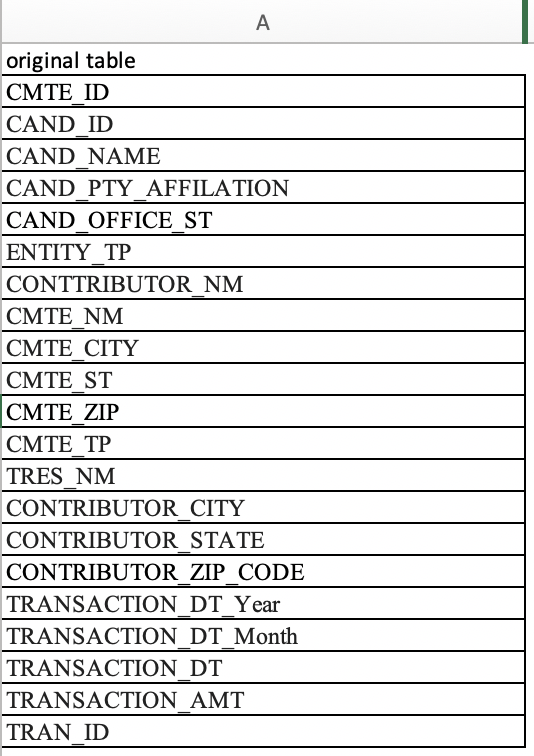

In [1]:
from IPython.display import Image
Image("/home/ubuntu/star1.png",width=250, height=250)


### We created 4 dimention tables and we finally build a star schema like this:

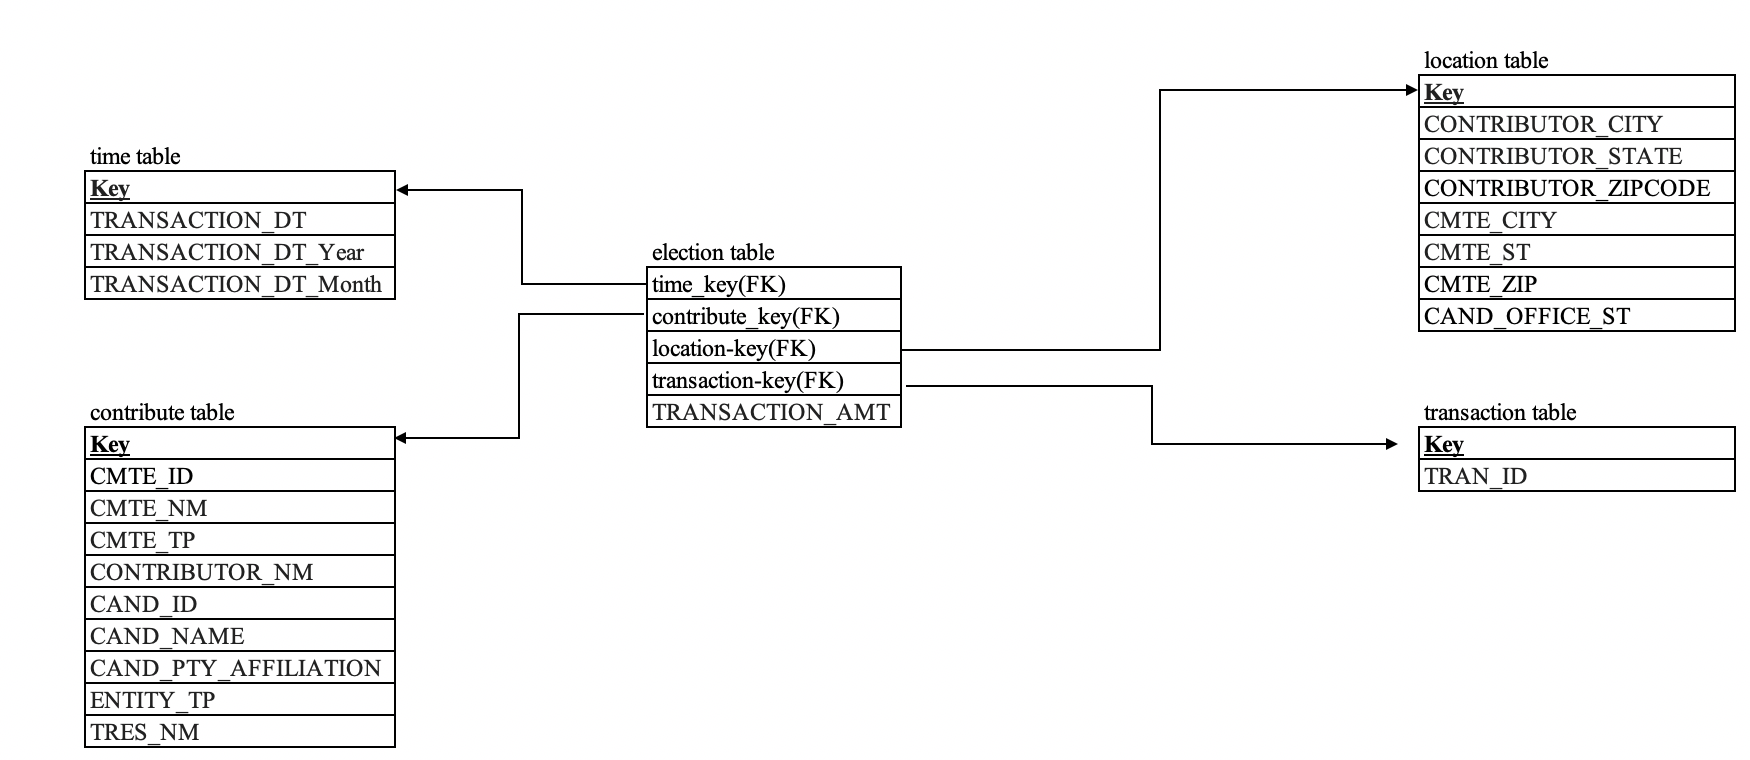

In [119]:
from IPython.display import Image
Image("/home/ubuntu/star2.png",width=600, height=600)


### We are going to create the dimention tables for election 2016 based on the star schema.

In [11]:
%%sql
DROP TABLE IF EXISTS time2016 CASCADE;

CREATE TABLE time2016 (
    key SERIAL PRIMARY KEY,
    year varchar(10) NULL,
    month varchar(10) NULL,
    DT varchar(20) NULL   
);

 * postgresql://student@/project3
Done.
Done.


[]

In [12]:
%%sql
INSERT INTO time2016 (year, month, DT)
SELECT DISTINCT TRANSACTION_DT_Year AS year, 
       TRANSACTION_DT_Month AS month,
       TRANSACTION_DT AS DT        
FROM election2016;

 * postgresql://student@/project3
753 rows affected.


[]

In [13]:
%%sql
SELECT * FROM time2016 LIMIT 5;

 * postgresql://student@/project3
5 rows affected.


key,year,month,dt
1,None,None,None
2,2015,5,5/26/2015
3,2014,4,4/28/2014
4,2015,4,4/17/2015
5,2015,11,11/30/2015


### 

In [14]:
%%sql
DROP TABLE IF EXISTS contribute2016;

CREATE TABLE contribute2016 (
    key SERIAL PRIMARY KEY,
    cmte_id VARCHAR(9) NOT NULL,
    cmte_name VARCHAR(200) NULL,
    cmte_type VARCHAR(1) NULL,
    contri_name VARCHAR(200) NULL,
    cand_id VARCHAR(9) NULL,
    cand_name VARCHAR(200) NULL,
    cand_party VARCHAR(3) NULL,
    entity VARCHAR(5) NULL,
    tres_name VARCHAR(90) NULL
);

 * postgresql://student@/project3
Done.
Done.


[]

In [15]:
%%sql
INSERT INTO contribute2016 (cmte_id, cmte_name, cmte_type, contri_name, cand_id, cand_name, cand_party, entity, tres_name)
SELECT DISTINCT CMTE_ID AS cmte_id, 
       CMTE_NM AS cmte_name, 
       CMTE_TP AS cmte_type, 
        CONTRIBUTOR_NM AS contri_name, 
        CAND_ID AS cand_id,
        CAND_NAME AS cand_name,
        CAND_PTY_AFFILATION AS cand_party,
        ENTITY_TP AS entity,
        TRES_NM AS tres_name
FROM election2016;

 * postgresql://student@/project3
306962 rows affected.


[]

In [17]:
%%sql
SELECT * FROM contribute2016 LIMIT 5;

 * postgresql://student@/project3
5 rows affected.


key,cmte_id,cmte_name,cmte_type,contri_name,cand_id,cand_name,cand_party,entity,tres_name
1,C00000059,2015 SENATORS CLASSIC COMMITTEE,S,BOOZMAN FOR ARKANSAS,S0AR00150,None,None,CCM,KEITH A DAVIS
2,C00000059,2016 SENATORS CLASSIC COMMITTEE,S,BOOZMAN FOR ARKANSAS,S0AR00150,None,None,CCM,KEITH A DAVIS
3,C00000059,BEEHIVE VICTORY FUND,N,FRIENDS OF JASON CHAFFETZ,H8UT03089,"CHAFFETZ, JASON",REP,CCM,"GARFIELD, BRUCE"
4,C00000059,BLAINE FOR CONGRESS,H,BLAINE FOR CONGRESS,H8MO09153,"LUETKEMEYER, W BLAINE",REP,CCM,"LUETKEMEYER, BRICE A."
5,C00000059,BLAINE FOR CONGRESS 2008,H,BLAINE FOR CONGRESS,H8MO09153,"LUETKEMEYER, W BLAINE",REP,CCM,"LUETKEMEYER, BRICE A."


### 

In [16]:
%%sql
DROP TABLE IF EXISTS location2016;

CREATE TABLE location2016 (
    key SERIAL PRIMARY KEY,
    contri_city VARCHAR(30) NULL,
    contri_state VARCHAR(5) NULL,
    contri_zip VARCHAR(9) NULL,
    cm_city VARCHAR(30) NULL,
    cm_state VARCHAR(2) NULL,
    cm_zip VARCHAR(9) NULL,
    cand_state VARCHAR(5) NULL
);

 * postgresql://student@/project3
Done.
Done.


[]

In [17]:
%%sql
INSERT INTO location2016 (contri_city, contri_state, contri_zip, cm_city, cm_state, cm_zip, cand_state)
SELECT DISTINCT CONTRIBUTOR_CITY AS contri_city,
                CONTRIBUTOR_STATE AS contri_state,
                CONTRIBUTOR_ZIP_CODE AS contri_zip,
                CMTE_CITY AS cm_city,
                CMTE_ST AS cm_state,
                CMTE_ZIP AS cm_zip,
                CAND_OFFICE_ST AS cand_state
FROM election2016;

 * postgresql://student@/project3
41756 rows affected.


[]

In [20]:
%%sql
SELECT * FROM location2016 LIMIT 5;

 * postgresql://student@/project3
5 rows affected.


key,contri_city,contri_state,contri_zip,cm_city,cm_state,cm_zip,cand_state
1,BIRMINGHAM,AL,35201,BIRMINGHAM,AL,35201,AL
2,", HARRISBURG",PA,17111,CLEVELAND HTS,OH,44121,US
3,", HARRISBURG",PA,17111,NEW YORK,NY,10044,US
4,", HARRISBURG",PA,17111,NEW YORK,NY,101855256,US
5,", HARRISBURG",PA,17111,PHILADELPHIA,PA,19110,None


### 

In [18]:
%%sql
DROP TABLE IF EXISTS transaction2016;

CREATE TABLE transaction2016 (
    key SERIAL PRIMARY KEY,
    t_id VARCHAR(32) NULL
);

 * postgresql://student@/project3
Done.
Done.


[]

In [19]:
%%sql
INSERT INTO transaction2016 (t_id)
SELECT DISTINCT TRAN_ID AS t_id
FROM election2016;

 * postgresql://student@/project3
333312 rows affected.


[]

In [23]:
%%sql
SELECT * FROM transaction2016 LIMIT 5;

 * postgresql://student@/project3
5 rows affected.


key,t_id
1,0000761897D13551968
2,000140EE022CCB25C10
3,00023AF1464CD015D6D
4,000316494A1E0DCE772
5,000381D5098985D41B5


## 

### Here are the codes we used to connect the 4 dimention tables with the fact table.

In [20]:
%%sql
ALTER TABLE election2016
ADD COLUMN time_key INTEGER,
ADD CONSTRAINT fk_TRANSACTION_DT_Year
    FOREIGN KEY (time_key)
    REFERENCES time2016 (key);

 * postgresql://student@/project3
Done.


[]

In [21]:
%%sql
UPDATE election2016
SET time_key = time2016.key
FROM time2016
WHERE election2016.TRANSACTION_DT_Year = time2016.year AND election2016.TRANSACTION_DT_Year = time2016.year AND election2016.TRANSACTION_DT_Month = time2016.month AND election2016.TRANSACTION_DT = time2016.DT;

 * postgresql://student@/project3
875147 rows affected.


[]

In [22]:
%%sql
ALTER TABLE election2016
ADD COLUMN contribute_key INTEGER,
ADD CONSTRAINT fk_CMTE_ID
    FOREIGN KEY (contribute_key)
    REFERENCES contribute2016 (key);

 * postgresql://student@/project3
Done.


[]

In [23]:
%%sql
UPDATE election2016
SET contribute_key = contribute2016.key
FROM contribute2016
WHERE election2016.CMTE_ID = contribute2016.cmte_id AND election2016.CMTE_NM = contribute2016.cmte_name AND election2016.CMTE_TP = contribute2016.cmte_type AND election2016.CONTRIBUTOR_NM = contribute2016.contri_name AND election2016.CAND_ID = contribute2016.cand_id AND election2016.CAND_NAME = contribute2016.cand_name AND election2016.CAND_PTY_AFFILATION = contribute2016.cand_party AND election2016.ENTITY_TP = contribute2016.entity AND election2016.TRES_NM = contribute2016.tres_name;


 * postgresql://student@/project3
505712 rows affected.


[]

In [24]:
%%sql
ALTER TABLE election2016
ADD COLUMN location_key INTEGER,
ADD CONSTRAINT fk_CONTRIBUTOR_CITY
    FOREIGN KEY (location_key)
    REFERENCES location2016 (key);

 * postgresql://student@/project3
Done.


[]

In [25]:
%%sql
UPDATE election2016
SET location_key = location2016.key
FROM location2016
WHERE election2016.CONTRIBUTOR_CITY = location2016.contri_city AND election2016.CONTRIBUTOR_STATE = location2016.contri_state AND election2016.CONTRIBUTOR_ZIP_code = location2016.contri_zip AND election2016.CMTE_CITY = location2016.cm_city AND election2016.CMTE_ST = location2016.cm_state AND election2016.CMTE_ZIP = location2016.cm_zip AND election2016.CAND_OFFICE_ST = location2016.cand_state;

 * postgresql://student@/project3
510891 rows affected.


[]

In [26]:
%%sql
ALTER TABLE election2016
ADD COLUMN transaction_key INTEGER,
ADD CONSTRAINT fk_TRAN_ID
    FOREIGN KEY (transaction_key)
    REFERENCES transaction2016 (key);

 * postgresql://student@/project3
Done.


[]

In [27]:
%%sql
UPDATE election2016
SET transaction_key = transaction2016.key
FROM transaction2016
WHERE election2016.TRAN_ID = transaction2016.t_id;

 * postgresql://student@/project3
878956 rows affected.


[]

#### We drop the columns and show the final election2016 table we have.

In [28]:
%%sql
ALTER TABLE election2016
DROP COLUMN TRANSACTION_DT_Year,
DROP COLUMN TRANSACTION_DT_Month,
DROP COLUMN TRANSACTION_DT,
DROP COLUMN CMTE_ID,
DROP COLUMN CMTE_NM,
DROP COLUMN CMTE_TP,
DROP COLUMN CONTRIBUTOR_NM,
DROP COLUMN CAND_ID,
DROP COLUMN CAND_NAME,
DROP COLUMN CAND_PTY_AFFILATION,
DROP COLUMN ENTITY_TP,
DROP COLUMN TRES_NM,
DROP COLUMN CONTRIBUTOR_CITY,
DROP COLUMN CONTRIBUTOR_STATE,
DROP COLUMN CONTRIBUTOR_ZIP_CODE,
DROP COLUMN CMTE_CITY,
DROP COLUMN CMTE_ST,
DROP COLUMN CMTE_ZIP,
DROP COLUMN CAND_OFFICE_ST,
DROP COLUMN TRAN_ID;

 * postgresql://student@/project3
Done.


[]

In [29]:
%%sql
SELECT *
FROM election2016
LIMIT 10;

 * postgresql://student@/project3
10 rows affected.


transaction_amt,time_key,contribute_key,location_key,transaction_key
1000.00,470,194581,None,222670
1000.00,490,None,None,221783
400.00,702,None,None,217867
2500.00,356,263403,None,217502
3000.00,431,None,None,4370
2500.00,52,None,None,4475
1000.00,243,220527,35010,218618
5000.00,111,7352,None,199765
2000.00,579,189262,None,199436
1000.00,272,166475,None,195716


## 

## Elections 2020 ##

#### Notice: We created election 2016 tables before and we will create election 2020 tables in the following. We did them separately because we think it's better and clear for exploring the answers to our questions and it will not spend a lot of time in running the metadata.

In [30]:
!wget ELECTION2020.csv https://group2dmfa.s3.amazonaws.com/ELECTION2020.csv

--2020-12-07 19:26:08--  http://election2020.csv/
Resolving election2020.csv (election2020.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘election2020.csv’
--2020-12-07 19:26:08--  https://group2dmfa.s3.amazonaws.com/ELECTION2020.csv
Resolving group2dmfa.s3.amazonaws.com (group2dmfa.s3.amazonaws.com)... 52.216.147.27
Connecting to group2dmfa.s3.amazonaws.com (group2dmfa.s3.amazonaws.com)|52.216.147.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76174278 (73M) [text/csv]
Saving to: ‘ELECTION2020.csv.1’

ELECTION2020.csv.1  100%[===================>]  72.64M  64.9MB/s    in 1.1s    

2020-12-07 19:26:10 (64.9 MB/s) - ‘ELECTION2020.csv.1’ saved [76174278/76174278]

FINISHED --2020-12-07 19:26:10--
Total wall clock time: 1.3s
Downloaded: 1 files, 73M in 1.1s (64.9 MB/s)


In [31]:
!head -n 5 ELECTION2020.csv

"CMTE_ID","CAND_ID","CAND_NAME","CAND_PTY_AFFILIATION","CAND_OFFICE_ST","ENTITY_TP","CONTRIBUTOR_NM","CMTE_NM","CMTE_CITY","CMTE_ST","CMTE_ZIP","CMTE_TP","TRES_NM","CONTRIBUTOR_CITY","CONTRIBUTOR_STATE","CONTRIBUTOR_ZIPCODE","TRANSACTION_DT_Year","TRANSACTION_DT_Month","TRANSACTION_DT","TRANSACTION_AMT","TRAN_ID"
"C00567180","H2FL06109","YOHO, THEODORE SCOTT","REP","FL","PAC","TED YOHO FOR CONGRESS","","","","","","","GAINESVILLE","FL","32608","2019","01","2019-01-08","1880","SB23.4447"
"C00104885","H2SC02042","CLYBURN, JAMES E.","DEM","SC","CCM","FRIENDS OF JIM CLYBURN","CHICAGO BRIDGE & IRON COMPANY POLITICAL ACTION COMMITTEE","BATON ROUGE","LA","70809","Q","KINNISON, DAVID G","COLUMBIA","SC","29211","2019","01","2019-01-07","470","SB23.17755"
"C00688408","S8MS00287","ESPY, MICHAEL","DEM","MS","ORG","JACKSON ADVOCATE","","","","","","","JACKSON","MS","39207","2018","12","2018-12-12","1000","SE.4233"
"C00414425","S6VA00093","WARNER, MARK ROBERT","DEM","VA","CCM","FRIENDS OF MARK WARNE

In [36]:
!head -n 50 ELECTION2020.csv | csvstat

  1. "CMTE_ID"

	Type of data:          Text
	Contains null values:  False
	Unique values:         20
	Longest value:         9 characters
	Most common values:    C00366013 (8x)
	                       C00364109 (7x)
	                       C00158881 (7x)
	                       C00432252 (5x)
	                       C00367995 (3x)

  2. "CAND_ID"

	Type of data:          Text
	Contains null values:  False
	Unique values:         42
	Longest value:         9 characters
	Most common values:    H8OH05036 (3x)
	                       H2NY14037 (2x)
	                       H2MO02102 (2x)
	                       H2OH03125 (2x)
	                       H2MD05155 (2x)

  3. "CAND_NAME"

	Type of data:          Text
	Contains null values:  False
	Unique values:         42
	Longest value:         32 characters
	Most common values:    LATTA, ROBERT EDWARD (3x)
	                       MALONEY, CAROLYN B. (2x)
	                       WAGNER, ANN L. (2x)
	                       BEATTY, JOYCE (2x)
	 

### We create the other fact table called election2020.

In [32]:
%%sql
DROP TABLE IF EXISTS election2020;

CREATE TABLE election2020 (
    CMTE_ID VARCHAR(9) NOT NULL,
    CAND_ID VARCHAR(9) NULL,
    CAND_NAME VARCHAR(200) NULL,
    CAND_PTY_AFFILATION VARCHAR(3) NULL,
    CAND_OFFICE_ST VARCHAR(5) NULL,
    ENTITY_TP VARCHAR(5) NULL,
    CONTRIBUTOR_NM VARCHAR(200) NULL,
    CMTE_NM VARCHAR(200) NULL,
    CMTE_CITY VARCHAR(30) NULL,
    CMTE_ST VARCHAR(2) NULL,
    CMTE_ZIP VARCHAR(9) NULL,
    CMTE_TP VARCHAR(1) NULL,
    TRES_NM VARCHAR(90) NULL,
    CONTRIBUTOR_CITY VARCHAR(30) NULL,
    CONTRIBUTOR_STATE VARCHAR(5) NULL,
    CONTRIBUTOR_ZIP_CODE VARCHAR(9) NULL,
    TRANSACTION_DT_Year VARCHAR(4) NOT NULL,
    TRANSACTION_DT_Month varchar(10) NOT NULL,
    TRANSACTION_DT varchar(20) NOT NULL,
    TRANSACTION_AMT NUMERIC (14,2) NULL,
    TRAN_ID VARCHAR(32) NULL  
);

 * postgresql://student@/project3
Done.
Done.


[]

In [33]:
%%sql
COPY election2020 FROM '/home/ubuntu/ELECTION2020.csv'
CSV
HEADER;

 * postgresql://student@/project3
345374 rows affected.


[]

In [34]:
%%sql
SELECT COUNT(*) FROM election2020;

 * postgresql://student@/project3
1 rows affected.


count
345374


In [40]:
%%sql
SELECT * FROM election2020
LIMIT 10

 * postgresql://student@/project3
10 rows affected.


cmte_id,cand_id,cand_name,cand_pty_affilation,cand_office_st,entity_tp,contributor_nm,cmte_nm,cmte_city,cmte_st,cmte_zip,cmte_tp,tres_nm,contributor_city,contributor_state,contributor_zip_code,transaction_dt_year,transaction_dt_month,transaction_dt,transaction_amt,tran_id
C00567180,H2FL06109,"YOHO, THEODORE SCOTT",REP,FL,PAC,TED YOHO FOR CONGRESS,,,,,,,GAINESVILLE,FL,32608,2019,01,2019-01-08,1880.00,SB23.4447
C00104885,H2SC02042,"CLYBURN, JAMES E.",DEM,SC,CCM,FRIENDS OF JIM CLYBURN,CHICAGO BRIDGE & IRON COMPANY POLITICAL ACTION COMMITTEE,BATON ROUGE,LA,70809,Q,"KINNISON, DAVID G",COLUMBIA,SC,29211,2019,01,2019-01-07,470.00,SB23.17755
C00688408,S8MS00287,"ESPY, MICHAEL",DEM,MS,ORG,JACKSON ADVOCATE,,,,,,,JACKSON,MS,39207,2018,12,2018-12-12,1000.00,SE.4233
C00414425,S6VA00093,"WARNER, MARK ROBERT",DEM,VA,CCM,FRIENDS OF MARK WARNER,,,,,,,ALEXANDRIA,VA,22314,2019,01,2019-01-29,1000.00,SB23.9011
C00325324,H4MN06087,"EMMER, THOMAS EARL JR.",REP,MN,CCM,EMMER FOR CONGRESS,NATIONAL MILK PRODUCERS FEDERATION PAC (NMPF PAC),ARLINGTON,VA,22201,Q,"BLEIBERG, PAUL",ANOKA,MN,55303,2019,01,2019-01-25,1500.00,B27CCDF382AE3419EB12
C00366013,H2NY14037,"MALONEY, CAROLYN B.",DEM,NY,CCM,MALONEY FOR CONGRESS,"NASDAQ, INC. PAC (NASDAQ PAC)",WASHINGTON,DC,200056145,Q,"DENNISON, ANN",NEW YORK,NY,101281326,2019,01,2019-01-02,2500.00,BE5946F36B95C4B1AA76
C00366013,H4NC10047,"MCHENRY, PATRICK TIMOTHY",REP,NC,CCM,MCHENRY FOR CONGRESS,"NASDAQ, INC. PAC (NASDAQ PAC)",WASHINGTON,DC,200056145,Q,"DENNISON, ANN",GASTONIA,NC,280532165,2019,01,2019-01-10,1000.00,B4A12FABC952A45BFAA6
C00366013,H4CA23011,"WATERS, MAXINE",DEM,CA,CCM,CITIZENS FOR WATERS,"NASDAQ, INC. PAC (NASDAQ PAC)",WASHINGTON,DC,200056145,Q,"DENNISON, ANN",LONG BEACH,CA,908028832,2019,01,2019-01-10,5000.00,BCBD63CBF768842AE9CC
C00366013,H0MO01066,"CLAY, WILLIAM LACY JR",DEM,MO,CCM,CLAY JR. FOR CONGRESS,"NASDAQ, INC. PAC (NASDAQ PAC)",WASHINGTON,DC,200056145,Q,"DENNISON, ANN",SAINT LOUIS,MO,631080544,2019,01,2019-01-10,1000.00,BCC5E5592BA664439810
C00366013,H2CA50026,"VARGAS, JUAN CARLOS",DEM,CA,CCM,VARGAS FOR CONGRESS,"NASDAQ, INC. PAC (NASDAQ PAC)",WASHINGTON,DC,200056145,Q,"DENNISON, ANN",ENCINITAS,CA,920248705,2019,01,2019-01-30,2500.00,B17C92544C28743A98AA


### We will create the 4 dimention tables for 2020 in the following.

In [35]:
%%sql
DROP TABLE IF EXISTS time2020 cascade;

CREATE TABLE time2020 (
    key SERIAL PRIMARY KEY,
    year varchar(4) NOT NULL,
    month varchar(10) NOT NULL,
    DT varchar(20) NOT NULL   
);

 * postgresql://student@/project3
Done.
Done.


[]

In [36]:
%%sql
INSERT INTO time2020 (year, month, DT)
SELECT DISTINCT TRANSACTION_DT_Year AS year, 
       TRANSACTION_DT_Month AS month,
       TRANSACTION_DT AS DT        
FROM election2020;

 * postgresql://student@/project3
706 rows affected.


[]

In [43]:
%%sql
SELECT * FROM time2020 LIMIT 10;

 * postgresql://student@/project3
10 rows affected.


key,year,month,dt
1,2020,09,2020-09-10
2,2020,06,2020-06-04
3,2019,03,2019-03-28
4,2020,10,2020-10-30
5,2020,04,2020-04-08
6,2020,03,2020-03-03
7,2020,02,2020-02-13
8,2019,12,2019-12-16
9,2020,05,2020-05-30
10,2020,04,2020-04-12


In [37]:
%%sql
DROP TABLE IF EXISTS contribute2020;

CREATE TABLE contribute2020 (
    key SERIAL PRIMARY KEY,
    cmte_id VARCHAR(9) NOT NULL,
    cmte_name VARCHAR(200) NULL,
    cmte_type VARCHAR(1) NULL,
    contri_name VARCHAR(200) NULL,
    cand_id VARCHAR(9) NULL,
    cand_name VARCHAR(200) NULL,
    cand_party VARCHAR(3) NULL,
    entity VARCHAR(5) NULL,
    tres_name VARCHAR(90) NULL
);

 * postgresql://student@/project3
Done.
Done.


[]

In [38]:
%%sql
INSERT INTO contribute2020 (cmte_id, cmte_name, cmte_type, contri_name, cand_id, cand_name, cand_party, entity, tres_name)
SELECT DISTINCT CMTE_ID AS cmte_id, 
       CMTE_NM AS cmte_name, 
       CMTE_TP AS cmte_type, 
        CONTRIBUTOR_NM AS contri_name, 
        CAND_ID AS cand_id,
        CAND_NAME AS cand_name,
        CAND_PTY_AFFILATION AS cand_party,
        ENTITY_TP AS entity,
        TRES_NM AS tres_name
FROM election2020;

 * postgresql://student@/project3
129271 rows affected.


[]

In [46]:
%%sql
SELECT * FROM contribute2020 LIMIT 10;

 * postgresql://student@/project3
10 rows affected.


key,cmte_id,cmte_name,cmte_type,contri_name,cand_id,cand_name,cand_party,entity,tres_name
1,C00000059,HALLMARK CARDS PAC,Q,ANN WAGNER FOR CONGRESS,H2MO02102,"WAGNER, ANN L.",REP,CCM,SARAH MOE
2,C00000059,HALLMARK CARDS PAC,Q,BILLY LONG FOR CONGRESS,H0MO07113,"LONG, BILLY MR.",REP,CCM,SARAH MOE
3,C00000059,HALLMARK CARDS PAC,Q,BLAINE FOR CONGRESS,H8MO09153,"LUETKEMEYER, W BLAINE",REP,CCM,SARAH MOE
4,C00000059,HALLMARK CARDS PAC,Q,BRENDA LAWRENCE FOR CONGRESS,H2MI14111,"LAWRENCE, BRENDA LULENAR",DEM,CCM,SARAH MOE
5,C00000059,HALLMARK CARDS PAC,Q,CARTWRIGHT FOR CONGRESS,H2PA17079,"CARTWRIGHT, MATTHEW A.",DEM,CCM,SARAH MOE
6,C00000059,HALLMARK CARDS PAC,Q,CLEAVER FOR CONGRESS,H4MO05234,"CLEAVER, EMANUEL II",DEM,CCM,SARAH MOE
7,C00000059,HALLMARK CARDS PAC,Q,COLLINS FOR SENATOR,S6ME00159,"COLLINS, SUSAN M.",REP,CCM,SARAH MOE
8,C00000059,HALLMARK CARDS PAC,Q,COMER FOR CONGRESS,H6KY01110,"COMER, JAMES",REP,CCM,SARAH MOE
9,C00000059,HALLMARK CARDS PAC,Q,COMMITTEE TO ELECT STEVE WATKINS,H8KS02199,"WATKINS, STEVEN C. JR.",REP,CCM,SARAH MOE
10,C00000059,HALLMARK CARDS PAC,Q,COMMITTEE TO RE-ELECT STEVE WATKINS,H8KS02199,"WATKINS, STEVEN C. JR.",REP,CCM,SARAH MOE


In [39]:
%%sql
DROP TABLE IF EXISTS location2020;

CREATE TABLE location2020 (
    key SERIAL PRIMARY KEY,
    contri_city VARCHAR(30) NULL,
    contri_state VARCHAR(5) NULL,
    contri_zip VARCHAR(9) NULL,
    cm_city VARCHAR(30) NULL,
    cm_state VARCHAR(2) NULL,
    cm_zip VARCHAR(9) NULL,
    cand_state VARCHAR(5) NULL
);

 * postgresql://student@/project3
Done.
Done.


[]

In [40]:
%%sql
INSERT INTO location2020 (contri_city, contri_state, contri_zip, cm_city, cm_state, cm_zip, cand_state)
SELECT DISTINCT CONTRIBUTOR_CITY AS contri_city,
                CONTRIBUTOR_STATE AS contri_state,
                CONTRIBUTOR_ZIP_CODE AS contri_zip,
                CMTE_CITY AS cm_city,
                CMTE_ST AS cm_state,
                CMTE_ZIP AS cm_zip,
                CAND_OFFICE_ST AS cand_state
FROM election2020;

 * postgresql://student@/project3
64770 rows affected.


[]

In [49]:
%%sql
SELECT * FROM location2020 LIMIT 10;

 * postgresql://student@/project3
10 rows affected.


key,contri_city,contri_state,contri_zip,cm_city,cm_state,cm_zip,cand_state
1,BALTIMORE,MD,21203,LINTHICUM HEIGHTS,MD,21090,MD
2,LAREDO,TX,78042,WINSTON-SALEM,NC,27102,TX
3,SCRANTON,PA,185010414,DENVER,CO,80204,PA
4,GLEN ALLEN,VA,23058,WASHINGTON,DC,200017400,VA
5,NEWPORT,KY,410721444,,,,KY
6,LEXINGTON,KY,40588,WASHINGTON,DC,20007,KY
7,AUBURN,AL,36831,ALEXANDRIA,VA,22314,AL
8,SAVANNAH,GA,31412,COLUMBUS,GA,31999,GA
9,CASPER,WY,82601,HIGHLAND PARK,IL,60035,WY
10,LYNDORA,PA,16045,MILWAUKEE,WI,53202,PA


In [41]:
%%sql
DROP TABLE IF EXISTS transaction2020;

CREATE TABLE transaction2020 (
    key SERIAL PRIMARY KEY,
    t_id VARCHAR(32) NULL
);

 * postgresql://student@/project3
Done.
Done.


[]

In [42]:
%%sql
INSERT INTO transaction2020 (t_id)
SELECT DISTINCT TRAN_ID AS t_id
FROM election2020;

 * postgresql://student@/project3
317278 rows affected.


[]

In [52]:
%%sql
SELECT * FROM transaction2020 LIMIT 5;

 * postgresql://student@/project3
5 rows affected.


key,t_id
1,A3C188353228647798FD
2,B2D0151FAF56F47B59D5
3,A2E8BAF9138CC401397A
4,844E5549FA94AB98324
5,SB23.41812


### We will insert the key to connect the dimention tables with the fact table election2020 we created before.

In [43]:
%%sql
ALTER TABLE election2020
ADD COLUMN time_key INTEGER,
ADD CONSTRAINT fk_TRANSACTION_DT_Year
    FOREIGN KEY (time_key)
    REFERENCES time2020 (key);

 * postgresql://student@/project3
Done.


[]

In [44]:
%%sql
UPDATE election2020
SET time_key = time2020.key
FROM time2020
WHERE election2020.TRANSACTION_DT_Year = time2020.year AND election2020.TRANSACTION_DT_Year = time2020.year AND election2020.TRANSACTION_DT_Month = time2020.month AND election2020.TRANSACTION_DT = time2020.DT;


 * postgresql://student@/project3
345374 rows affected.


[]

In [45]:
%%sql
ALTER TABLE election2020
ADD COLUMN contribute_key INTEGER,
ADD CONSTRAINT fk_CMTE_ID
    FOREIGN KEY (contribute_key)
    REFERENCES contribute2020 (key);

 * postgresql://student@/project3
Done.


[]

In [46]:
%%sql
UPDATE election2020
SET contribute_key = contribute2020.key
FROM contribute2020
WHERE election2020.CMTE_ID = contribute2020.cmte_id AND election2020.CMTE_NM = contribute2020.cmte_name AND election2020.CMTE_TP = contribute2020.cmte_type AND election2020.CONTRIBUTOR_NM = contribute2020.contri_name AND election2020.CAND_ID = contribute2020.cand_id AND election2020.CAND_NAME = contribute2020.cand_name AND election2020.CAND_PTY_AFFILATION = contribute2020.cand_party AND election2020.ENTITY_TP = contribute2020.entity AND election2020.TRES_NM = contribute2020.tres_name;


 * postgresql://student@/project3
345374 rows affected.


[]

In [48]:
%%sql
ALTER TABLE election2020
ADD COLUMN location_key INTEGER,
ADD CONSTRAINT fk_CONTRIBUTOR_CITY
    FOREIGN KEY (location_key)
    REFERENCES location2020 (key);

 * postgresql://student@/project3
Done.


[]

In [49]:
%%sql
UPDATE election2020
SET location_key = location2020.key
FROM location2020
WHERE election2020.CONTRIBUTOR_CITY = location2020.contri_city AND election2020.CONTRIBUTOR_STATE = location2020.contri_state AND election2020.CONTRIBUTOR_ZIP_code = location2020.contri_zip AND election2020.CMTE_CITY = location2020.cm_city AND election2020.CMTE_ST = location2020.cm_state AND election2020.CMTE_ZIP = location2020.cm_zip AND election2020.CAND_OFFICE_ST = location2020.cand_state;

                

 * postgresql://student@/project3
345374 rows affected.


[]

In [50]:
%%sql
ALTER TABLE election2020
ADD COLUMN transaction_key INTEGER,
ADD CONSTRAINT fk_TRAN_ID
    FOREIGN KEY (transaction_key)
    REFERENCES transaction2020 (key);

 * postgresql://student@/project3
Done.


[]

In [51]:
%%sql
UPDATE election2020
SET transaction_key = transaction2020.key
FROM transaction2020
WHERE election2020.TRAN_ID = transaction2020.t_id;

 * postgresql://student@/project3
345374 rows affected.


[]

### We will drop the columns and form our final fact table election2020.

In [52]:
%%sql
ALTER TABLE election2020
DROP COLUMN TRANSACTION_DT_Year,
DROP COLUMN TRANSACTION_DT_Month,
DROP COLUMN TRANSACTION_DT,
DROP COLUMN CMTE_ID,
DROP COLUMN CMTE_NM,
DROP COLUMN CMTE_TP,
DROP COLUMN CONTRIBUTOR_NM,
DROP COLUMN CAND_ID,
DROP COLUMN CAND_NAME,
DROP COLUMN CAND_PTY_AFFILATION,
DROP COLUMN ENTITY_TP,
DROP COLUMN TRES_NM,
DROP COLUMN CONTRIBUTOR_CITY,
DROP COLUMN CONTRIBUTOR_STATE,
DROP COLUMN CONTRIBUTOR_ZIP_CODE,
DROP COLUMN CMTE_CITY,
DROP COLUMN CMTE_ST,
DROP COLUMN CMTE_ZIP,
DROP COLUMN CAND_OFFICE_ST,
DROP COLUMN TRAN_ID;



 * postgresql://student@/project3
Done.


[]

In [62]:
%%sql
SELECT *
FROM election2020
LIMIT 10;

 * postgresql://student@/project3
10 rows affected.


transaction_amt,time_key,contribute_key,location_key,transaction_key
2000.00,621,100515,42166,44299
5000.00,250,80723,14365,2063
1000.00,489,89249,50580,120469
1000.00,259,92357,17621,315207
2500.00,117,108443,13201,311662
2500.00,28,106881,4553,90995
500.00,674,84514,54929,138665
2800.00,522,117110,14669,53460
1000.00,323,92636,17788,205230
153.00,522,114270,31548,180472


## 

### -------------------------------------Q & A-------------------------------------

## Question1

What are the names of the top 5 Candidates associated with the Democratic Party and top 5 Candidates associated with the Republican Party. Did the candidate/party that received the most fundings from the committees won the elections? 

#### Election year 2016

In [53]:
%%sql
select contribute2016.cand_name, contribute2016.cand_party, sum(election2016.TRANSACTION_AMT) as total_transaction
from contribute2016
JOIN election2016
    ON contribute2016.key = election2016.contribute_key
where contribute2016.cand_party = 'REP'
group by contribute2016.cand_name, contribute2016.cand_party
order by total_transaction desc
limit 5;


 * postgresql://student@/project3
5 rows affected.


cand_name,cand_party,total_transaction
"TRUMP, DONALD J. / MICHAEL R. PENCE",REP,625300624.00
"CRUZ, RAFAEL EDWARD ""TED""",REP,88701312.00
"BUSH, JEB",REP,87243504.00
"RUBIO, MARCO",REP,51594388.00
"DOLD, ROBERT JAMES JR",REP,36602262.00


In 2016, Donald Trump, Rafarel Cruz, Jeb Bush, Marco Rubio and Robert Dold are top 5 candidates who received the most funding from the committees associated with the Republican Party.

In [54]:
%%sql
select contribute2016.cand_name, contribute2016.cand_party, sum(election2016.TRANSACTION_AMT) as total_transaction
from contribute2016
JOIN election2016
    ON contribute2016.key = election2016.contribute_key
where contribute2016.cand_party = 'DEM'
group by contribute2016.cand_name, contribute2016.cand_party
order by total_transaction desc
limit 5;

 * postgresql://student@/project3
5 rows affected.


cand_name,cand_party,total_transaction
"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",DEM,413811920.00
"SANDERS, BERNARD",DEM,72948012.00
"GALLEGO, PETE",DEM,15453216.00
"BERA, AMERISH",DEM,10227472.00
"KIHUEN, RUBEN",DEM,9134382.00


In 2016, Hillary Clinton, Bernard Sanders, Pete Gallego, Amerish Bera and Ruben Kihuen are top 5 candidates who received the most funding from the committees associated with the Democratic Party.

In [65]:
%%sql
select contribute2016.cand_name, location2016.cand_state, sum(election2016.TRANSACTION_AMT) as total_transaction
from contribute2016
JOIN election2016
    ON contribute2016.key = election2016.contribute_key
JOIN location2016
    ON location2016.key = election2016.location_key
group by contribute2016.cand_name, location2016.cand_state
order by total_transaction desc
limit 5;

 * postgresql://student@/project3
5 rows affected.


cand_name,cand_state,total_transaction
"TRUMP, DONALD J. / MICHAEL R. PENCE",NY,625259818.00
"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",US,413800988.00
"CRUZ, RAFAEL EDWARD ""TED""",US,88701312.00
"BUSH, JEB",US,87243504.00
"SANDERS, BERNARD",US,72944688.00


In [66]:
%%sql
select contribute2016.cand_party, sum(election2016.TRANSACTION_AMT) as total_transaction
from contribute2016
JOIN election2016
    ON contribute2016.key = election2016.contribute_key
group by contribute2016.cand_party
order by total_transaction desc
limit 5;

 * postgresql://student@/project3
5 rows affected.


cand_party,total_transaction
REP,1364480377.00
DEM,769865048.00
LIB,10289181.00
DFL,8122370.00
UNK,3909812.00


From the two outputs above, we can see the candidate(Donald Trump) and party(Republician) that received the most fundings from the committees won the elections in 2016.

#### Election year 2020

In [67]:
%%sql
select contribute2020.cand_name, contribute2020.cand_party, sum(election2020.TRANSACTION_AMT) as total_transaction
from contribute2020
JOIN election2020
    ON contribute2020.key = election2020.contribute_key
where contribute2020.cand_party = 'REP'
group by contribute2020.cand_name, contribute2020.cand_party
order by total_transaction desc
limit 5;

 * postgresql://student@/project3
5 rows affected.


cand_name,cand_party,total_transaction
"TRUMP, DONALD J.",REP,205354367.00
"TILLIS, THOM R. SEN.",REP,44218753.00
"ERNST, JONI K",REP,39575552.00
"DAINES, STEVE",REP,29001681.00
"COLLINS, SUSAN M.",REP,27656591.00


In 2020, Donald Trump, Thom Tillis, Joni Ernst, Steve Daines and Susan Collins are top 5 candidates who received the most funding from the committees associated with the Republican Party.

In [68]:
%%sql
select contribute2020.cand_name, contribute2020.cand_party, sum(election2020.TRANSACTION_AMT) as total_transaction
from contribute2020
JOIN election2020
    ON contribute2020.key = election2020.contribute_key
where contribute2020.cand_party = 'DEM'
group by contribute2020.cand_name, contribute2020.cand_party
order by total_transaction desc
limit 5;

 * postgresql://student@/project3
5 rows affected.


cand_name,cand_party,total_transaction
"BIDEN, JOSEPH R JR",DEM,233305002.00
"GREENFIELD, THERESA",DEM,29552597.00
"CUNNINGHAM, CAL",DEM,27773650.00
"PETERS, GARY",DEM,23295595.00
"GIDEON, SARA",DEM,23045105.00


In 2020, Joseph Biden, Theresa Greenfield, Cal Cunningham, Gary Peters and Sara Gideon are top 5 candidates who received the most funding from the committees associated with the Democratic Party.

In [69]:
%%sql
select contribute2020.cand_name, location2020.cand_state, sum(election2020.TRANSACTION_AMT) as total_transaction
from contribute2020
JOIN election2020
    ON contribute2020.key = election2020.contribute_key
JOIN location2020
    ON location2020.key = election2020.location_key
group by contribute2020.cand_name, location2020.cand_state
order by total_transaction desc
limit 5;

 * postgresql://student@/project3
5 rows affected.


cand_name,cand_state,total_transaction
"BIDEN, JOSEPH R JR",US,233305002.00
"TRUMP, DONALD J.",US,205354367.00
"TILLIS, THOM R. SEN.",NC,44218753.00
"ERNST, JONI K",IA,39575552.00
"GREENFIELD, THERESA",IA,29552597.00


In [70]:
%%sql
select contribute2020.cand_party, sum(election2020.TRANSACTION_AMT) as total_transaction
from contribute2020
JOIN election2020
    ON contribute2020.key = election2020.contribute_key
group by contribute2020.cand_party
order by total_transaction desc
limit 5;

 * postgresql://student@/project3
5 rows affected.


cand_party,total_transaction
DEM,825048962.00
REP,776749093.00
DFL,5461312.00
IND,4795371.00
NPP,126250.00


From the two outputs above, we can see the candidate(Joseph Biden) and party(Democratic) that received the most fundings from the committees won the elections in 2020.

## 

## Question 2

2.1 What are the names/state of the top 10 committees that contributed to the Candidates associated with the Democratic Party and to the Candidates associated with the Republican Party in 2016 and in 2020?

2.2 Compare the largest transaction amount in both Parties. Whether the amount of committee contributions affect the change to be a winner of each candidate. We base on the facts to answer.


#### Election year 2016

In [55]:
%%sql
select contribute2016.cmte_name, location2016.cm_state, sum(election2016.TRANSACTION_AMT) as total_transaction
from contribute2016
JOIN election2016
    ON contribute2016.key = election2016.contribute_key
JOIN location2016
    ON location2016.key = election2016.location_key
where contribute2016.cand_party = 'DEM'
group by contribute2016.cmte_name, location2016.cm_state
order by total_transaction desc
limit 10;


 * postgresql://student@/project3
10 rows affected.


cmte_name,cm_state,total_transaction
PEOPLE IN COMMAND/PIC,OH,137933674.00
HILLARY FOR AMERICA,NY,137933674.00
FUTURE OF AMERICAN LIVES MATTER,NY,137933640.00
LUANN BENNETT FOR CONGRESS,VA,7179385.00
SANTARSIERO FOR CONGRESS,PA,6747846.00
ZEPHYR TEACHOUT FOR CONGRESS,NY,6119061.00
ITHACA AND TOMPKINS COUNTY FOR BERNIE SANDERS,NY,6078724.00
NORTHEAST MUSICIANS FOR SOCIAL DEMOCRACY,NH,6078724.00
BERNIE 2016,VT,6078724.00
LAS CRUCES FOR BERNIE,NM,6078724.00


These 10 committees contributing most for Democratic Party in 2016.

In [56]:
%%sql
select contribute2016.cmte_name, location2016.cm_state, sum(election2016.TRANSACTION_AMT) as total_transaction
from contribute2016
JOIN election2016
    ON contribute2016.key = election2016.contribute_key
JOIN location2016
    ON location2016.key = election2016.location_key
where contribute2016.cand_party = 'REP'
group by contribute2016.cmte_name, location2016.cm_state
order by total_transaction desc
limit 10;


 * postgresql://student@/project3
10 rows affected.


cmte_name,cm_state,total_transaction
"DONALD J. TRUMP FOR PRESIDENT, INC.",NY,312629909.00
VERMONT TRUMP DELEGATE FUND,VT,312629909.00
"JEB 2016, INC.",NC,87243504.00
MARCO RUBIO FOR PRESIDENT,FL,51594388.00
RESTORING LIBERTY''S PROMISE DELEGATE COMMITTEE LLC,CO,29567104.00
CRUZ FOR PRESIDENT,TX,29567104.00
CRUZ INTO PRESIDENT,TX,29567104.00
CHRIS CHRISTIE FOR PRESIDENT INC,NJ,23411070.00
KASICH FOR AMERICA INC,OH,18634633.00
DOLD FOR CONGRESS,IL,6100377.00


These 10 committees contributing most for Republican Party in 2016.

### Compare the largest transaction amount in both parties using bar chart


In [3]:
%%sql
DROP VIEW IF EXISTS Q2_16;
CREATE OR REPLACE VIEW Q2_16 AS
select cmte_name, cand_party, sum(election2016.TRANSACTION_AMT) as total_transaction
from contribute2016
JOIN election2016
    ON contribute2016.key = election2016.contribute_key
where cmte_name = 'PEOPLE IN COMMAND/PIC' OR cmte_name ='DONALD J. TRUMP FOR PRESIDENT, INC.'
group by cmte_name, cand_party
order by total_transaction;

 * postgresql://student@/project3
Done.
Done.


[]

In [4]:
%%sql
SELECT *
FROM Q2_16;

 * postgresql://student@/project3
2 rows affected.


cmte_name,cand_party,total_transaction
PEOPLE IN COMMAND/PIC,DEM,137937318.00
"DONALD J. TRUMP FOR PRESIDENT, INC.",REP,312650312.00


In [5]:
combine16 = %sql SELECT * FROM Q2_16

 * postgresql://student@/project3
2 rows affected.


In [6]:
df16 = combine16.DataFrame()

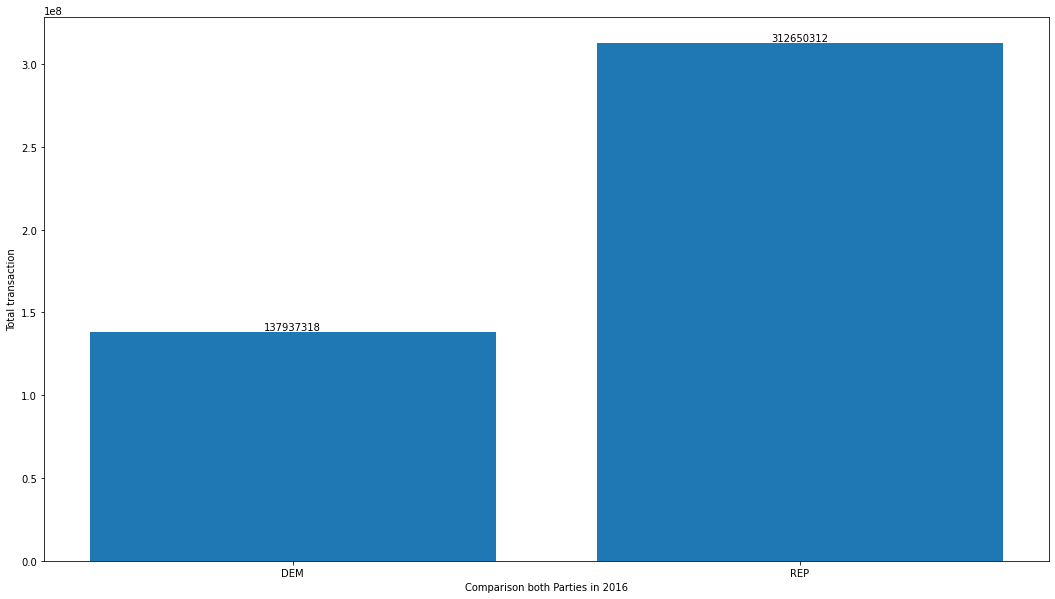

In [7]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
plt.figure(figsize=(18,10))
rects=plt.bar(df16["cand_party"], df16["total_transaction"])
plt.xlabel("Comparison both Parties in 2016")
plt.ylabel("Total transaction") 
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height,  '%s' % int(height), ha='center', va='bottom')
plt.show()

#### Election year 2020

In [73]:
%%sql
select contribute2020.cmte_name, location2020.cm_state, sum(election2020.TRANSACTION_AMT) as total_transaction
from contribute2020
JOIN election2020
    ON contribute2020.key = election2020.contribute_key
JOIN location2020
    ON location2020.key = election2020.location_key
where contribute2020.cand_party = 'DEM'
group by contribute2020.cmte_name, location2020.cm_state
order by total_transaction desc
limit 10;


 * postgresql://student@/project3
10 rows affected.


cmte_name,cm_state,total_transaction
,,304326124.00
NRSC,DC,80350042.00
PRESERVE AMERICA PAC,VA,75981075.00
NRCC,DC,47124389.00
UNITE THE COUNTRY,DC,21895490.00
PERSIST PAC,DC,14820734.00
DSCC,DC,12610015.00
DNC SERVICES CORP / DEMOCRATIC NATIONAL COMMITTEE,DC,9450908.00
DCCC,DC,9393337.00
BETTER FUTURE MI FUND,MA,7903264.00


These 10 committees contributing most for Democratic Party in 2020.

In [74]:
%%sql
select contribute2020.cmte_name, location2020.cm_state, sum(election2020.TRANSACTION_AMT) as total_transaction
from contribute2020
JOIN election2020
    ON contribute2020.key = election2020.contribute_key
JOIN location2020
    ON location2020.key = election2020.location_key
where contribute2020.cand_party = 'REP'
group by contribute2020.cmte_name, location2020.cm_state
order by total_transaction desc
limit 10;


 * postgresql://student@/project3
10 rows affected.


cmte_name,cm_state,total_transaction
,,384925832.00
DCCC,DC,66889465.00
DSCC,DC,56751860.00
THE LINCOLN PROJECT,DC,24032264.00
DEFENDING DEMOCRACY TOGETHER,DC,9024761.00
GEORGIA UNITED VICTORY,GA,8708631.00
NRSC,DC,7520130.00
AMERICANS FOR CONSTITUTIONAL LIBERTY DBA THE CONSERVATIVE CAUCUS,VA,6525717.00
NRCC,DC,5766549.00
UA UNION PLUMBERS & PIPEFITTERS VOTE! PAC (UNITED ASSOCIATION OF JOURNEYMEN AND APPRENTICES OF THE PLUMBING & PIPEFITTING INDUSTRY OF THE UNITED STATES AND CANADA),MD,5511459.00


These 10 committees contributing most for Republican Party in 2020.

### Compare the largest transaction amount in both parties using bar chart

In [8]:
%%sql
DROP VIEW IF EXISTS Q2_20;
CREATE OR REPLACE VIEW Q2_20 AS
select cmte_name, cand_party, sum(election2020.TRANSACTION_AMT) as total_transaction
from contribute2020
JOIN election2020
    ON contribute2020.key = election2020.contribute_key
where cmte_name = 'NRSC' OR cmte_name ='DCCC'
group by cmte_name, cand_party
order by total_transaction;

 * postgresql://student@/project3
Done.
Done.


[]

In [9]:
%%sql
SELECT *
FROM Q2_20;

 * postgresql://student@/project3
7 rows affected.


cmte_name,cand_party,total_transaction
DCCC,DFL,9655.00
DCCC,IND,199725.00
NRSC,IND,1095150.00
NRSC,REP,7520130.00
DCCC,DEM,9393337.00
DCCC,REP,66889465.00
NRSC,DEM,80350042.00


In [10]:
combine20 =%sql Select * from Q2_20 WHERE "total_transaction" > 66000000 ORDER BY "total_transaction"

 * postgresql://student@/project3
2 rows affected.


In [11]:
df20 = combine20.DataFrame()
df20

,cmte_name,cand_party,total_transaction
0,DCCC,REP,66889465.00
1,NRSC,DEM,80350042.00


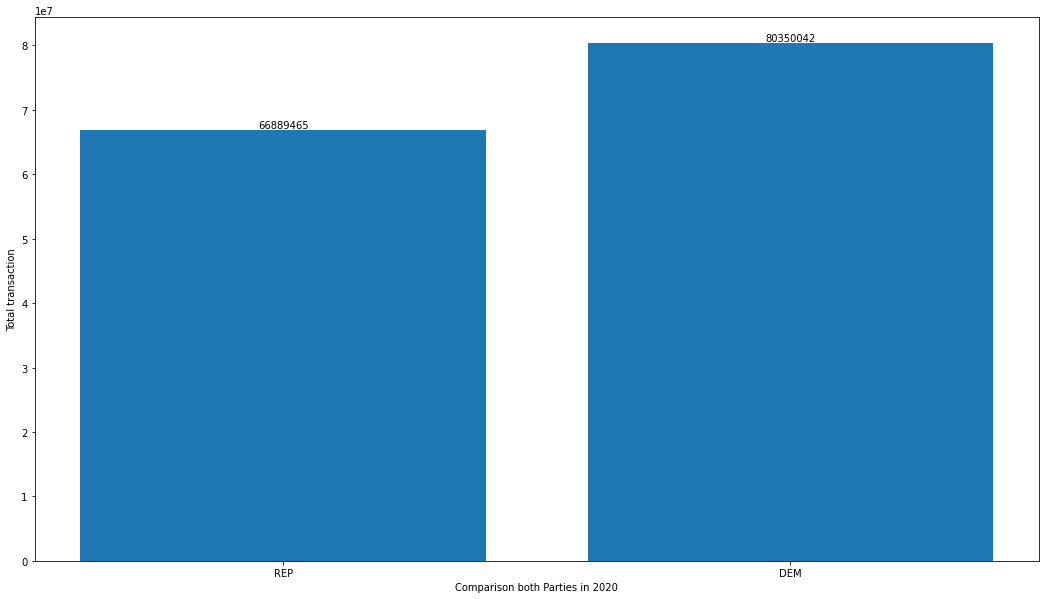

In [12]:
plt.figure(figsize=(18,10))
rects=plt.bar(df20["cand_party"], df20["total_transaction"])
plt.xlabel("Comparison both Parties in 2020")
plt.ylabel("Total transaction") 
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height,  '%s' % int(height), ha='center', va='bottom')
plt.show()

Conclusion: Regarding the bar chart in 2016 and 2020, we may conclude that the amount of the contributions may affect the chance of winning. In 2016, the Republicant was  received approximately double with Democracy and Trump won the election in 2016. In contrast, in 2020, the Democracy has received more contribution than Republicant and Joe Bien has won to be an elected president this year. It may assume that the more contribution received, the more investments they put on the campaigns.


### 

## Question 3

How much the cities of Virginia contribute to CLINTON, HILLARY RODHAM and to TRUMP, DONALD J.in 2016?

In [13]:
%%sql

SELECT location2016.contri_state,location2016.contri_city,sum(election2016.TRANSACTION_AMT) as total_amt
FROM contribute2016
JOIN election2016
    ON contribute2016.key = election2016.contribute_key
JOIN location2016
    ON location2016.key = election2016.contribute_key
WHERE contribute2016.cand_name = 'CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE' and location2016.contri_state='VA'
GROUP BY location2016.contri_state,location2016.contri_city
ORDER BY total_amt DESC
limit 10;


 * postgresql://student@/project3
7 rows affected.


contri_state,contri_city,total_amt
VA,ALEXANDRIA,304611.00
VA,DULLES,108124.00
VA,ARLINGTON,21775.00
VA,CHRISTIANS,13270.00
VA,LEESBURG,5276.00
VA,ANNANDALE,5000.00
VA,VIRGINIA BEACH,1650.00


In [14]:
%%sql
SELECT location2016.contri_state,location2016.contri_city,sum(election2016.TRANSACTION_AMT) as total_amt
FROM contribute2016
JOIN election2016
    ON contribute2016.key = election2016.contribute_key
JOIN location2016
    ON location2016.key = election2016.contribute_key
WHERE contribute2016.cand_name = 'TRUMP, DONALD J. / MICHAEL R. PENCE'and location2016.contri_state='VA'
GROUP BY location2016.contri_state,location2016.contri_city
ORDER BY total_amt DESC
limit 10;


 * postgresql://student@/project3
6 rows affected.


contri_state,contri_city,total_amt
VA,ALEXANDRIA,1203180.00
VA,CHESAPEAKE,829850.00
VA,ALEXANDRA,218950.00
VA,HAYMARKET,105350.00
VA,ARLINGTON,53364.00
VA,MANASSAS,5496.00


Comments: After join 3 dimention tables,we found two president candidates CLINTON, HILLARY RODHAM and TRUMP, DONALD J.have different contribution amounts from committees in different cities of Virginia in 2016. From the result, CLINTON, HILLARY RODHAM received the most in ALEXANDRIA and TRUMP, DONALD J. received the most in ALEXANDRIA. But the amounts have a big gap here. TRUMP got the most contribution from from ALEXANDRIA compared with CLINTON. The result may be different from the final official result, because there are many missing values in the metadata and the transaction amount is from the commitees to candidates except other contribution sources.


### 

## Question 4

How much the cities of Virginia contribute to candidates associated with Democratic Party and to the Candidates associated with the Republican Party in 2016?

In [15]:
%%sql
SELECT contribute2016.cand_party,location2016.contri_state,location2016.contri_city,sum(election2016.TRANSACTION_AMT) as total_amt
FROM contribute2016
JOIN election2016
    ON contribute2016.key = election2016.contribute_key
JOIN location2016
    ON location2016.key = election2016.contribute_key
WHERE contribute2016.cand_party='DEM' and location2016.contri_state='VA'
GROUP BY contribute2016.cand_party,location2016.contri_state,location2016.contri_city
ORDER BY total_amt DESC
limit 5;


 * postgresql://student@/project3
5 rows affected.


cand_party,contri_state,contri_city,total_amt
DEM,VA,ALEXANDRIA,1709875.00
DEM,VA,ARLINGTON,570218.00
DEM,VA,DULLES,125874.00
DEM,VA,LEESBURG,107546.00
DEM,VA,RICHMOND,103520.00


<BarContainer object of 5 artists>

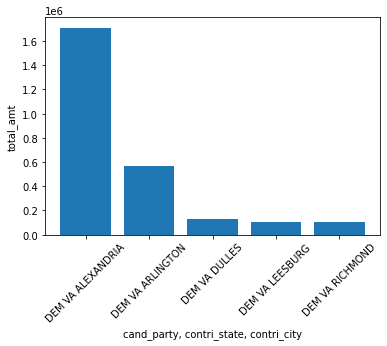

In [16]:
_.bar()

In [22]:
%%sql
SELECT contribute2020.cand_party,location2020.contri_state,location2020.contri_city,sum(election2020.TRANSACTION_AMT) as total_amt
FROM contribute2020
JOIN election2020
    ON contribute2020.key = election2020.contribute_key
JOIN location2020
    ON location2020.key = election2020.contribute_key
WHERE contribute2020.cand_party='DEM' and location2020.contri_state='VA'
GROUP BY contribute2020.cand_party,location2020.contri_state,location2020.contri_city
ORDER BY total_amt DESC
limit 5;

 * postgresql://student@/project3
5 rows affected.


cand_party,contri_state,contri_city,total_amt
DEM,VA,ALEXANDRIA,4166082.00
DEM,VA,RICHMOND,3097508.00
DEM,VA,NELLYSFORD,1966174.00
DEM,VA,FALLS CHURCH,1744056.00
DEM,VA,ANNANDALE,1011826.00


<BarContainer object of 5 artists>

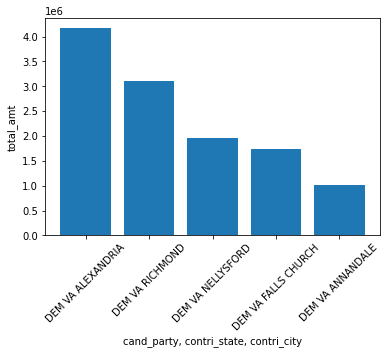

In [23]:
_.bar()

Comments: We found the contribution to candidates assocaited with DEM party is mostly from ALEXANDRIA in 2016 and 2020, but the second city is ARLINGTON in 2016, RICHMOND in 2020.

In [17]:
%%sql
SELECT contribute2016.cand_party,location2016.contri_state,location2016.contri_city,sum(election2016.TRANSACTION_AMT) as total_amt
FROM contribute2016
JOIN election2016
    ON contribute2016.key = election2016.contribute_key
JOIN location2016
    ON location2016.key = election2016.contribute_key
WHERE contribute2016.cand_party='REP' and location2016.contri_state='VA'
GROUP BY contribute2016.cand_party,location2016.contri_state,location2016.contri_city
ORDER BY total_amt DESC
limit 5;


 * postgresql://student@/project3
5 rows affected.


cand_party,contri_state,contri_city,total_amt
REP,VA,ALEXANDRIA,2837116.00
REP,VA,ARLINGTON,945722.00
REP,VA,CHESAPEAKE,846850.00
REP,VA,HAYMARKET,293162.00
REP,VA,ALEXANDRA,220950.00


<BarContainer object of 5 artists>

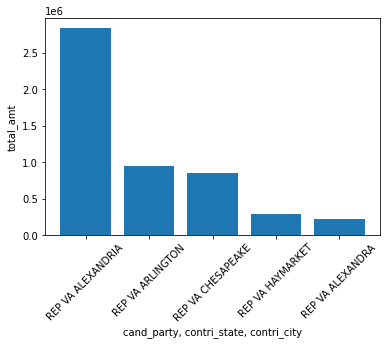

In [18]:
_.bar()

In [24]:
%%sql
SELECT contribute2020.cand_party,location2020.contri_state,location2020.contri_city,sum(election2020.TRANSACTION_AMT) as total_amt
FROM contribute2020
JOIN election2020
    ON contribute2020.key = election2020.contribute_key
JOIN location2020
    ON location2020.key = election2020.contribute_key
WHERE contribute2020.cand_party='REP' and location2020.contri_state='VA'
GROUP BY contribute2020.cand_party,location2020.contri_state,location2020.contri_city
ORDER BY total_amt DESC
limit 5;


 * postgresql://student@/project3
5 rows affected.


cand_party,contri_state,contri_city,total_amt
REP,VA,ALEXANDRIA,6249259.00
REP,VA,VIRGINIA BEACH,1633394.00
REP,VA,ARLINGTON,510195.00
REP,VA,RICHMOND,468710.00
REP,VA,CHARLOTTESVILLE,341750.00


<BarContainer object of 5 artists>

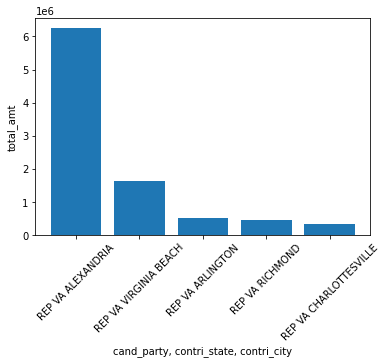

In [25]:
_.bar()

Comments: We explored the difference between contribution amounts from committees to the candidates associated with Democratic Party and to the candidates associated with the Republican Party in the different cities in the swing state Virginia. We found the contribution to candidates assocaited with REP party is mostly from ALEXANDRIA in 2016 and 2020, but the second city is ARLINGTON in 2016, VIRGINIA BEACH in 2020.

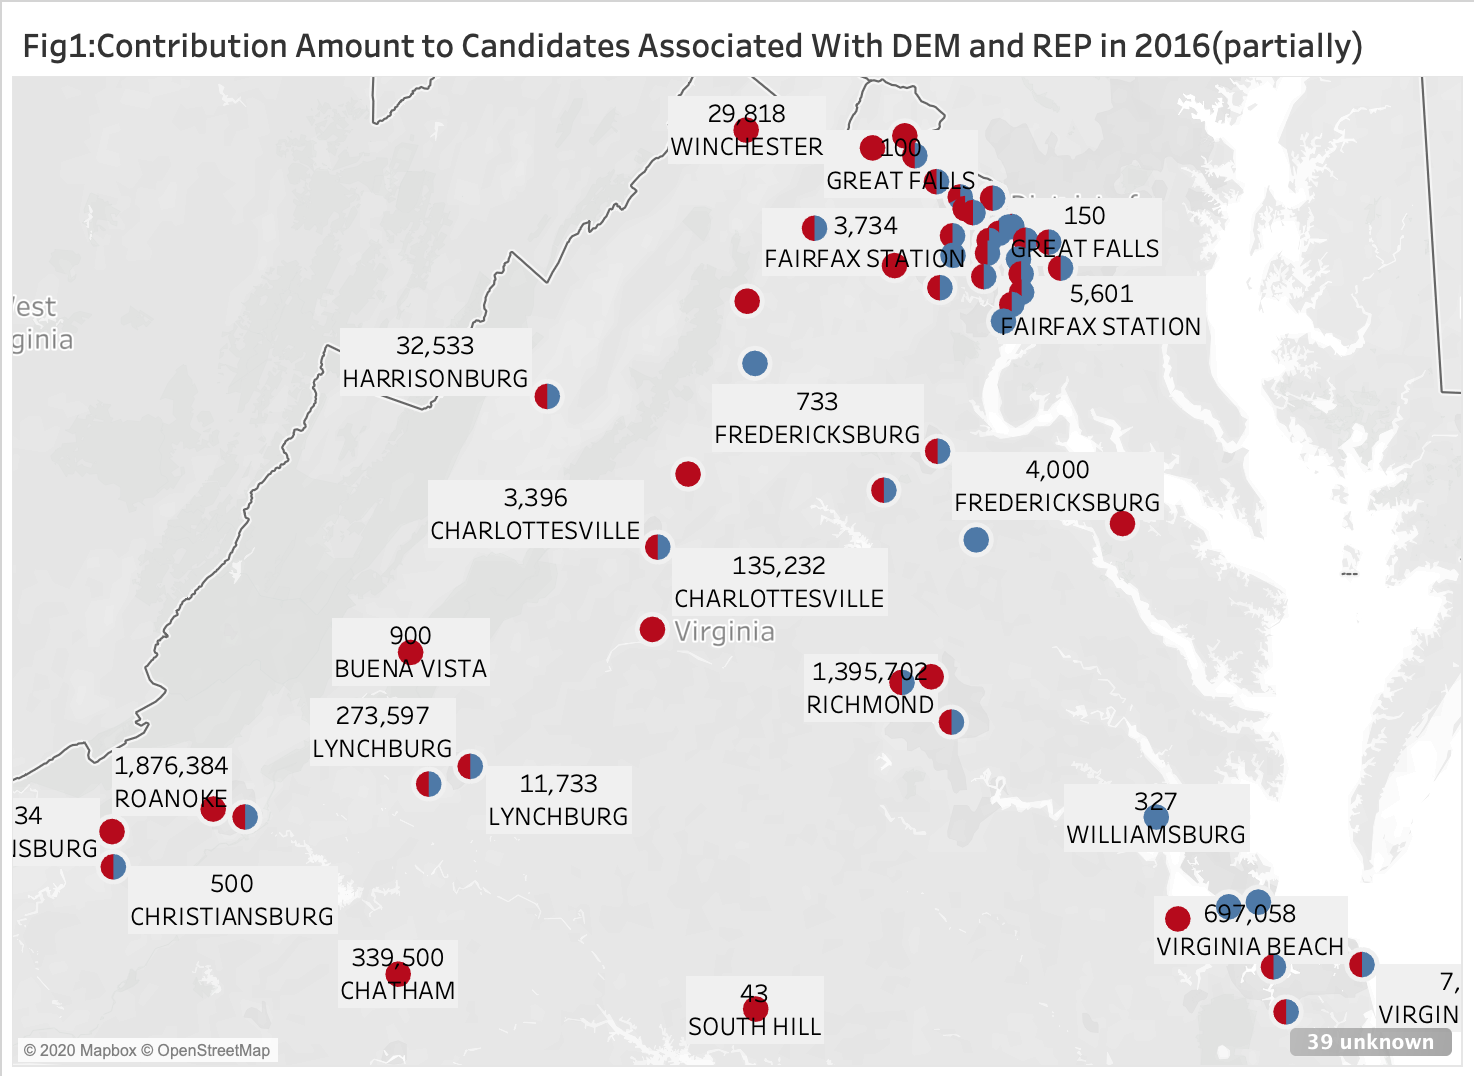

In [1]:
from IPython.display import Image
Image("/home/ubuntu/2016.png",width=500, height=500)


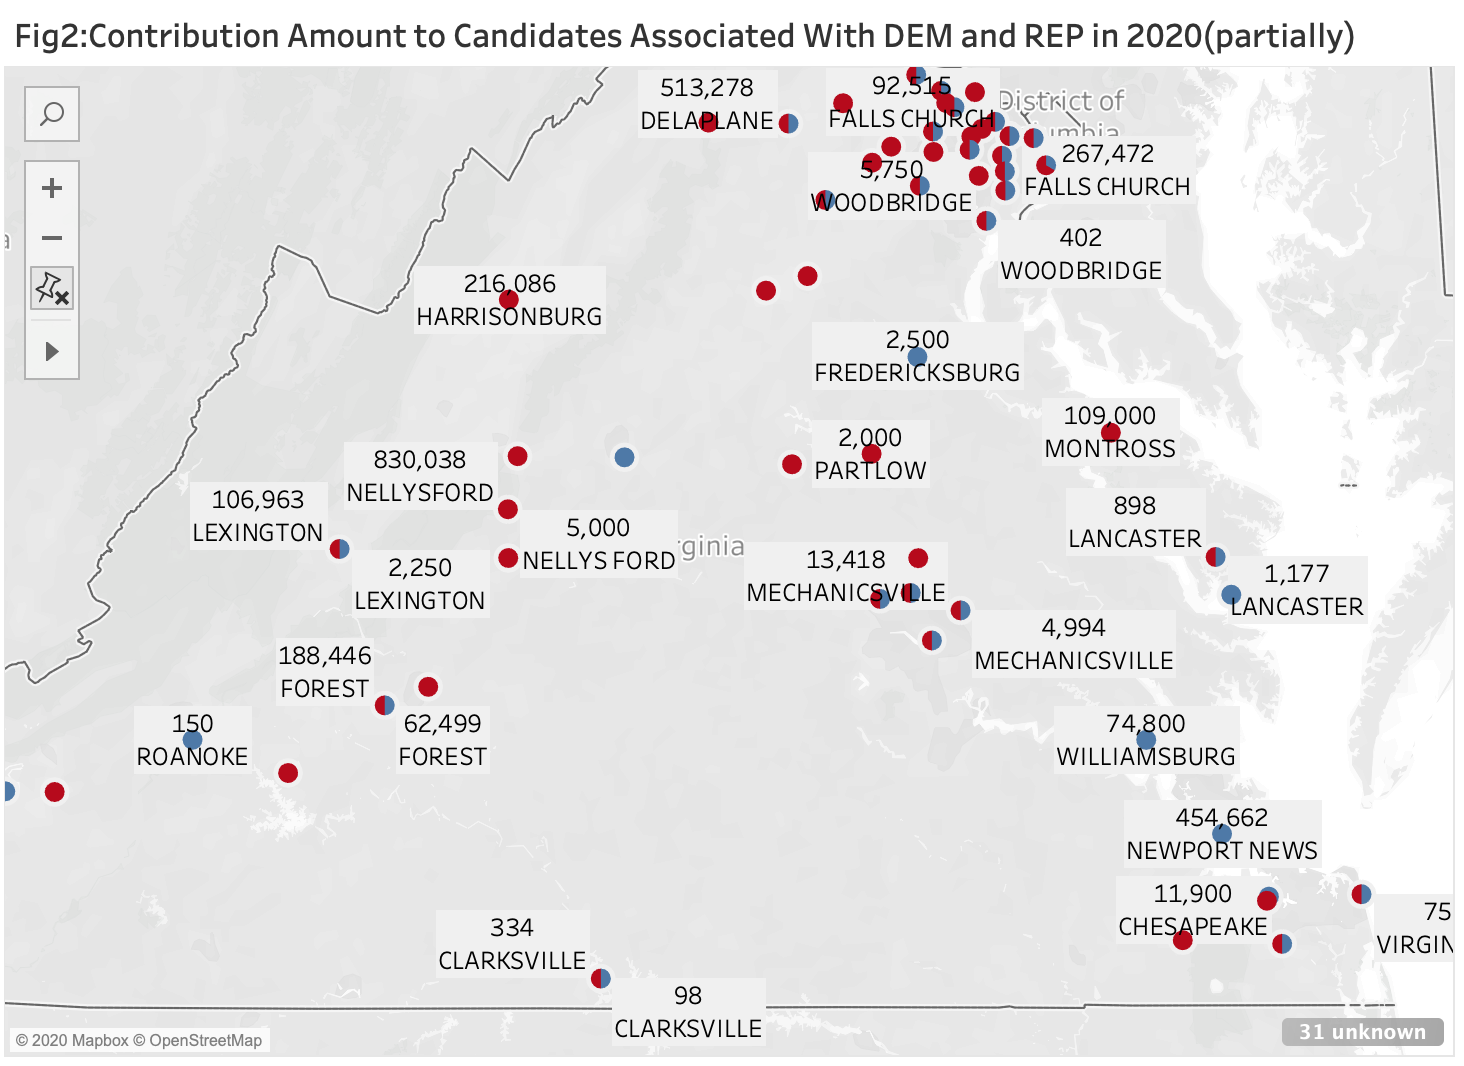

In [2]:
from IPython.display import Image
Image("/home/ubuntu/2020.png",width=500, height=500)

In terms of this map, beacuse some cities are hard to be identified on the Tableau map, there are a lot of unknown cities. But this visual can be seen that the distribution of contribution to REP and DEM in Virginia clearly partially. Virginia is a swing state. There is no obvious tend about what the most contribution go to REP or DEM.

## 

## Question 5

After Obama eased restrictions on travel and trade to Cuba on Jan 15,2015, how the contribution amount to DEM candidates change?


In [19]:
%%sql
SELECT contribute2016.cand_party,avg(election2016.TRANSACTION_AMT) as avg_amt
FROM contribute2016
JOIN election2016
    ON contribute2016.key = election2016.contribute_key
JOIN time2016
    ON time2016.key = election2016.contribute_key
WHERE time2016.DT<='2015-01-15' and contribute2016.cand_party='DEM'
GROUP BY contribute2016.cand_party
ORDER BY avg_amt DESC;


 * postgresql://student@/project3
1 rows affected.


cand_party,avg_amt
DEM,2164.2857142857142857


In [20]:
%%sql
SELECT contribute2016.cand_party,avg(election2016.TRANSACTION_AMT) as avg_amt
FROM contribute2016
JOIN election2016
    ON contribute2016.key = election2016.contribute_key
JOIN time2016
    ON time2016.key = election2016.contribute_key
WHERE time2016.DT>'2015-01-15'and contribute2016.cand_party='DEM'
GROUP BY contribute2016.cand_party
ORDER BY avg_amt DESC;


 * postgresql://student@/project3
1 rows affected.


cand_party,avg_amt
DEM,2060.7476635514018692


Comments: We select a special data Jan 15,2015 on which Obama eased restrictions on travel and trade to Cuba.We want to know if there is a change among the contribution amount from committees to candidates associated with Democratic Party after introducing the policies. And the date interval before Jan 15,2015 and after Jan 15,2015 are different so we used averge calculation rather than sum calculation. In conclusion, even tough the amount decreases, there are still very close. And it's not very rigorous to say the change is influenced by the new policy from Obama.


## Question 6

As we all known, Republicans are more focused on the economy growth. So what the change of contribution to candidates associated with Republicans in Texas after Trump announced reopening plan and Texas began to reopen on May 1st,2020?


In [4]:
%%sql
SELECT contribute2020.cand_party,avg(election2020.TRANSACTION_AMT) as avg_amt
FROM contribute2020
JOIN election2020
    ON contribute2020.key = election2020.contribute_key
JOIN time2020
    ON time2020.key = election2020.contribute_key
JOIN location2020
    ON location2020.key = election2020.contribute_key
WHERE contribute2020.cand_party = 'REP' and location2020.contri_state='TX' and time2020.DT<'2020-05-01'
GROUP BY contribute2020.cand_party
ORDER BY avg_amt DESC
limit 10;


 * postgresql://student@/project3
1 rows affected.


cand_party,avg_amt
REP,2076.0869565217391304


In [5]:
%%sql
SELECT contribute2020.cand_party,avg(election2020.TRANSACTION_AMT) as avg_amt
FROM contribute2020
JOIN election2020
    ON contribute2020.key = election2020.contribute_key
JOIN time2020
    ON time2020.key = election2020.contribute_key
JOIN location2020
    ON location2020.key = election2020.contribute_key
WHERE contribute2020.cand_party = 'REP' and location2020.contri_state='TX' and time2020.DT>'2020-05-01'
GROUP BY contribute2020.cand_party
ORDER BY avg_amt DESC
limit 10;


 * postgresql://student@/project3
1 rows affected.


cand_party,avg_amt
REP,2428.5714285714285714


Comments: From the result, we can know the average contribution amount increases after Texas began with reopening after May 1st,2020. It may mean Texas people tend to agree with Republicans's proposition. 

## 

## Question 7

What is the total/average amount of all contributions per party per month in 2020 and in 2016?


#### Republican election year 2016

In [89]:
%%sql
select time2016.month, sum(election2016.TRANSACTION_AMT) as total
from contribute2016
JOIN election2016
	ON contribute2016.key = election2016.contribute_key
JOIN time2016
	ON time2016.key = election2016.time_key
where contribute2016.cand_party = 'REP'
group by time2016.month
order by time2016.month
limit 12;


 * postgresql://student@/project3
12 rows affected.


month,total
1,110013260.00
10,332646770.00
11,129561541.00
12,38158321.00
2,102693476.00
3,115203602.00
4,46894705.00
5,50302138.00
6,88536887.00
7,71114697.00


#### Republican election year 2020

In [5]:
%%sql
select time2020.month, sum(election2020.TRANSACTION_AMT) as total
from contribute2020
JOIN election2020
	ON contribute2020.key = election2020.contribute_key
JOIN time2020
	ON time2020.key = election2020.time_key
where contribute2020.cand_party = 'REP'
group by time2020.month
order by time2020.month
limit 12;

 * postgresql://student@/project3
12 rows affected.


month,total
,17162154.00
01,15468691.00
02,42671016.00
03,48667845.00
04,25613667.00
05,45296810.00
06,81774841.00
07,96151878.00
08,116131599.00
09,192264985.00


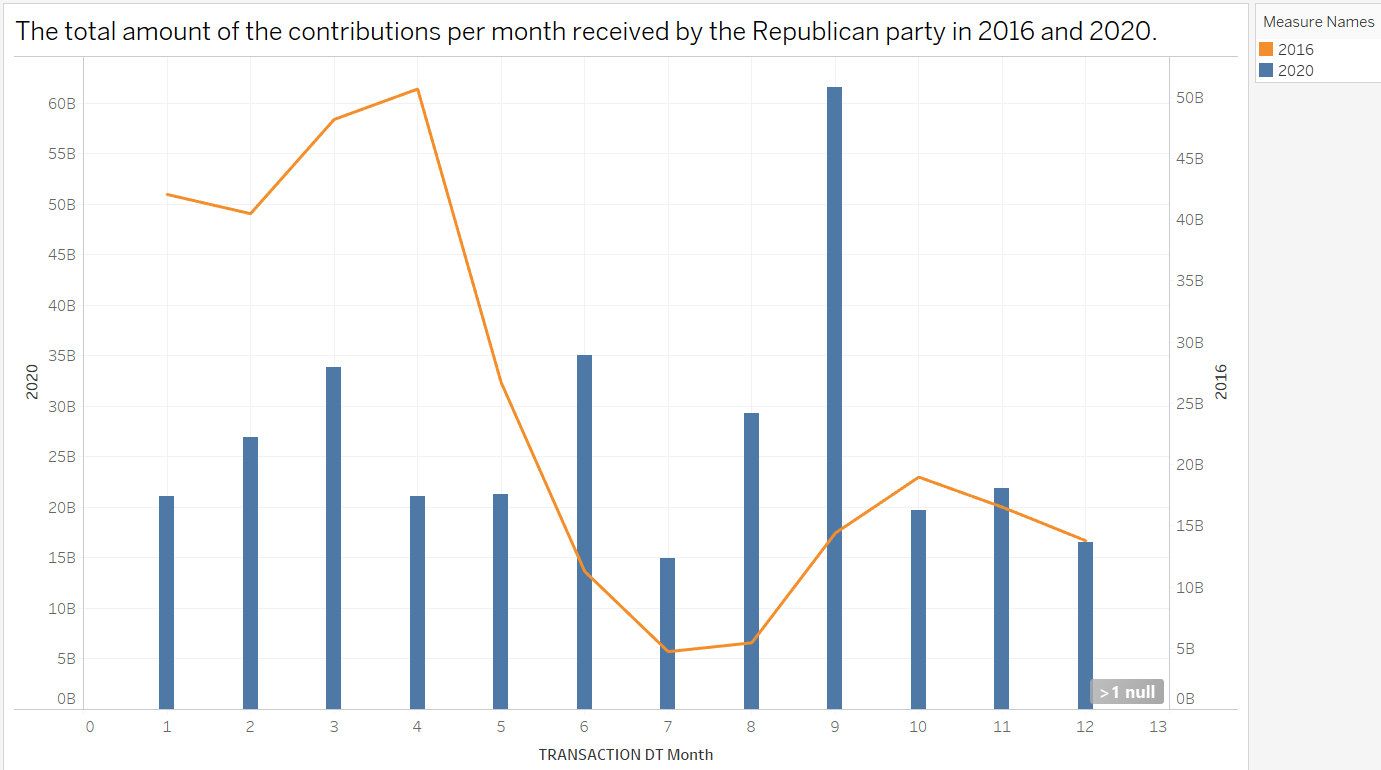

In [6]:
from IPython.display import Image
Image("/home/ubuntu/rep20162020.png",width=500, height=500)

#### Democratic election year 2016

In [92]:
%%sql
select time2016.month, sum(election2016.TRANSACTION_AMT) as total
from contribute2016
JOIN election2016
	ON contribute2016.key = election2016.contribute_key
JOIN time2016
	ON time2016.key = election2016.time_key
where contribute2016.cand_party = 'DEM'
group by time2016.month
order by time2016.month
limit 12;


 * postgresql://student@/project3
12 rows affected.


month,total
1,20498290.00
10,273424218.00
11,102355185.00
12,17785832.00
2,48131084.00
3,42756840.00
4,30536160.00
5,25720157.00
6,44870271.00
7,24618440.00


#### Democratic election year 2020

In [95]:
%%sql
select time2020.month, sum(election2020.TRANSACTION_AMT) as total
from contribute2020
JOIN election2020
	ON contribute2020.key = election2020.contribute_key
JOIN time2020
	ON time2020.key = election2020.time_key
where contribute2020.cand_party = 'DEM'
group by time2020.month
order by time2020.month
limit 13;


 * postgresql://student@/project3
13 rows affected.


month,total
,14975184.00
01,18515718.00
02,73345697.00
03,39125895.00
04,23645833.00
05,35810333.00
06,78421784.00
07,78498227.00
08,157215212.00
09,218937665.00


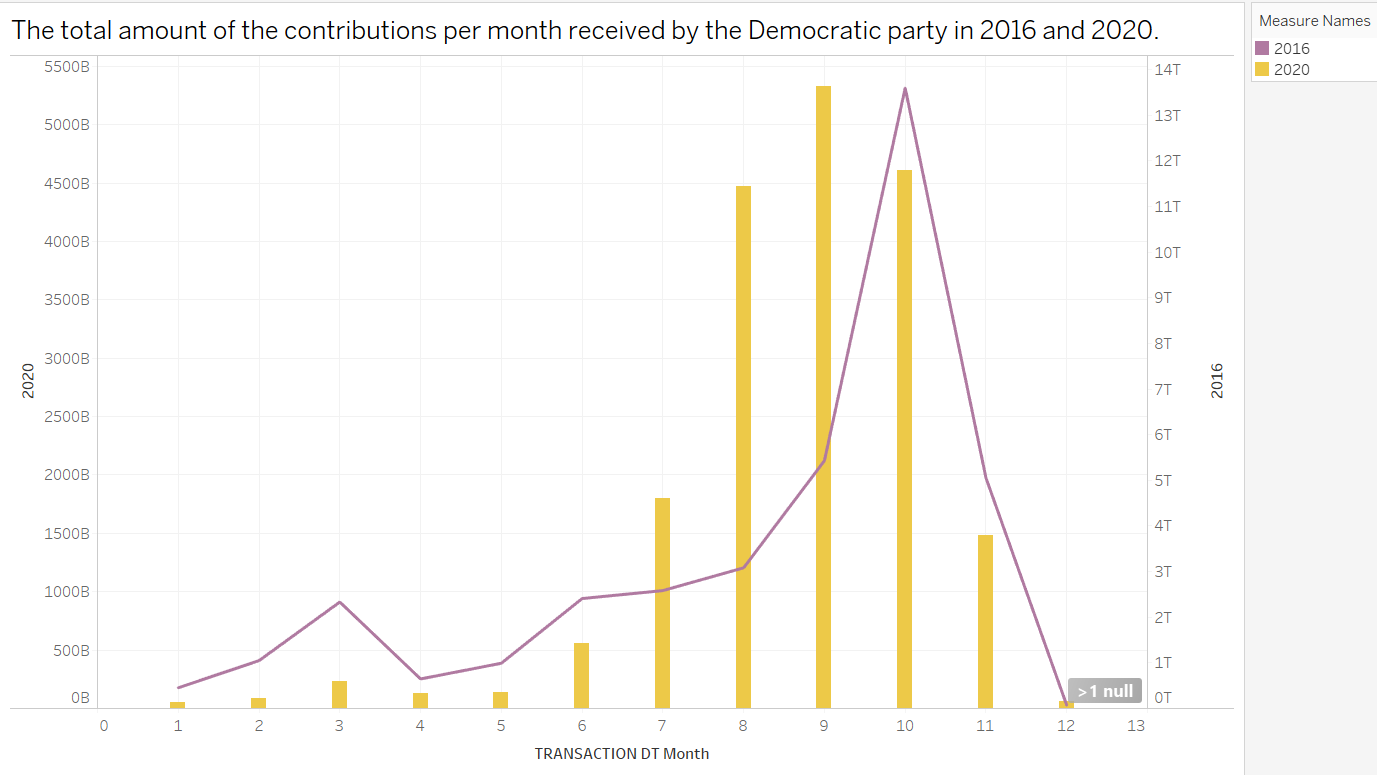

In [7]:
from IPython.display import Image
Image("/home/ubuntu/dem20162020.png",width=500, height=500)

Comments: from the graphs above we can see that the Democratic Party received the highest amount of contributions in October 2016 and in August 2020. The Repiblican Party received the highest amount of contributions in April 2016 and August of 2020. 

## 

## Question 8

What is the total/average amount of committee contribution for the top 5 state in 2020? In 2016? Did the average amount for the top 5 states increase/decrease in 2020 compare to 2016? 


In [98]:
%%sql
select location2016.cm_state, sum(election2016.TRANSACTION_AMT) as total_transaction
from location2016
JOIN election2016
    ON location2016.key = election2016.location_key
group by location2016.cm_state
order by total_transaction desc
limit 5;


 * postgresql://student@/project3
5 rows affected.


cm_state,total_transaction
NY,665046838.00
VT,322152201.00
OH,183115118.00
NC,109174271.00
TX,106899876.00


These five states above contribute most to the committees in 2016.

In [99]:
%%sql
select location2016.cm_state, avg(election2016.TRANSACTION_AMT) as avg_transaction
from location2016
JOIN election2016
    ON location2016.key = election2016.location_key
group by location2016.cm_state
order by avg_transaction desc
limit 5;

 * postgresql://student@/project3
5 rows affected.


cm_state,avg_transaction
NC,9519.9050401116149285
FL,8765.0595569408883447
NV,8193.3625099920063949
CO,7254.7582736007320421
VT,6679.4982583454281567


Top 5 states with avearge contribution in 2016.

In [101]:
%%sql
select location2020.cm_state, sum(election2020.TRANSACTION_AMT) as total_transaction
from location2020
JOIN election2020
    ON location2020.key = election2020.location_key
group by location2020.cm_state
order by total_transaction desc
limit 6;

 * postgresql://student@/project3
6 rows affected.


cm_state,total_transaction
,690575264.00
DC,551864460.00
VA,133466471.00
MA,20064148.00
TX,18939327.00
IL,17158541.00


These five states above contribute most to the committees in 2020.

In [103]:
%%sql
select location2020.cm_state, avg(election2020.TRANSACTION_AMT) as avg_transaction
from location2020
JOIN election2020
    ON location2020.key = election2020.location_key
group by location2020.cm_state
order by avg_transaction desc
limit 5;

 * postgresql://student@/project3
5 rows affected.


cm_state,avg_transaction
KY,34143.025773195876
DE,31776.766891891892
KS,11898.832160804020
MA,10576.778070637849
NC,8504.2800221361372441


Top 5 states with avearge contribution in 2020.

Conclusion: Compared to the average amount for the top 5 states in 2016 and 2020, we can see the top five states with average amounts are totally different to the year 2016, and the average amount for the top 5 states in 2020 are obviously increasing.

## 

## Question 9

In election year 2020, What happened to the avg contribution of the top five donor states (DC, VA, MA,TX,IL) in the last month before election day? 
What happened to the  avg contribution of Democratic Party and Republician party in the last month before election day?  


In [112]:
%%sql
select location2020.cm_state, avg(election2020.TRANSACTION_AMT) as avg_transaction
from location2020
JOIN election2020
    ON location2020.key = election2020.location_key
JOIN time2020
    ON time2020.key = election2020.time_key
where time2020.dt>='2020-10-01' AND (location2020.cm_state = 'DC' or location2020.cm_state = 'VA' or location2020.cm_state = 'MA' or location2020.cm_state = 'TX' or location2020.cm_state = 'IL')
group by location2020.cm_state


 * postgresql://student@/project3
5 rows affected.


cm_state,avg_transaction
DC,73147.412996389892
IL,2675.4047619047619048
MA,69411.875000000000
TX,12062.251184834123
VA,2994.3577981651376147


In [113]:
%%sql
select location2020.cm_state, avg(election2020.TRANSACTION_AMT) as avg_transaction
from location2020
JOIN election2020
    ON location2020.key = election2020.location_key
JOIN time2020
    ON time2020.key = election2020.time_key
where time2020.dt<'2020-10-01' AND (location2020.cm_state = 'DC' or location2020.cm_state = 'VA' or location2020.cm_state = 'MA' or location2020.cm_state = 'TX' or location2020.cm_state = 'IL')
group by location2020.cm_state

 * postgresql://student@/project3
5 rows affected.


cm_state,avg_transaction
DC,6252.1549317273534636
IL,2490.9983818770226537
MA,9567.2750670241286863
TX,2321.7946466506160600
VA,6239.1929816319819608


Compared two outputs above, we can see the averge transaction in the last month before election day are much higher in four states. 

In [114]:
%%sql
select contribute2020.cand_party, avg(election2020.TRANSACTION_AMT) as avg_transaction
from contribute2020
JOIN election2020
    ON contribute2020.key = election2020.contribute_key
JOIN time2020
    ON time2020.key = election2020.time_key
where time2020.dt>='2020-10-01' AND (contribute2020.cand_party = 'DEM' or contribute2020.cand_party = 'REP')
group by contribute2020.cand_party


 * postgresql://student@/project3
2 rows affected.


cand_party,avg_transaction
DEM,26953.114507520621
REP,23343.437747819191


In [115]:
%%sql
select contribute2020.cand_party, avg(election2020.TRANSACTION_AMT) as avg_transaction
from contribute2020
JOIN election2020
    ON contribute2020.key = election2020.contribute_key
JOIN time2020
    ON time2020.key = election2020.time_key
where time2020.dt<'2020-10-01' AND (contribute2020.cand_party = 'DEM' or contribute2020.cand_party = 'REP')
group by contribute2020.cand_party


 * postgresql://student@/project3
2 rows affected.


cand_party,avg_transaction
DEM,6279.0582864137086903
REP,3308.6308446750948283


Compared the two outputs above, we can see the avergae transaction of two party in the last month before election day are much higher.

Conclusion: Based on the two results about state and party, we can conclude the candidate will receive more contributions in the last month of election day.